# **Upoznavanje sa dataset-om**

**Importovanje biblioteka za obradu *dataset*-a i iscrtavanje podataka**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns

**Učitavanje *dataset*-a**

In [2]:
df = pd.read_csv("train.csv")

**Obeležja *dataset*-a**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

**Uzorak iz *dataset*-a**

In [4]:
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


**Ispisivanje jedinstvenih vrednosti za svako obeležje**

In [6]:
for col in df.columns:
  unique = df[col].unique()
  print(f"Unique: {col}")
  print(unique)
  print("Number of values: ",unique.size)
  print("\n")

Unique: policy_id
['ID00001' 'ID00002' 'ID00003' ... 'ID58590' 'ID58591' 'ID58592']
Number of values:  58592


Unique: policy_tenure
[0.51587359 0.67261851 0.84111026 ... 1.16227251 1.2363069  0.12442893]
Number of values:  58592


Unique: age_of_car
[0.05 0.02 0.11 0.07 0.16 0.14 0.04 0.01 0.12 0.03 0.1  0.09 0.   0.08
 0.15 0.13 0.39 0.17 0.06 0.18 0.2  0.29 0.19 0.38 0.22 0.23 0.26 0.21
 0.27 0.28 0.3  0.25 0.31 0.33 0.35 0.32 0.24 0.37 1.   0.42 0.36 0.45
 0.49 0.46 0.34 0.82 0.44 0.62 0.81]
Number of values:  49


Unique: age_of_policyholder
[0.64423077 0.375      0.38461538 0.43269231 0.63461538 0.51923077
 0.40384615 0.42307692 0.29807692 0.44230769 0.59615385 0.48076923
 0.30769231 0.57692308 0.60576923 0.47115385 0.5        0.39423077
 0.61538462 0.31730769 0.32692308 0.49038462 0.46153846 0.92307692
 0.69230769 0.45192308 0.41346154 0.68269231 0.36538462 0.35576923
 0.50961538 0.53846154 0.67307692 0.34615385 0.54807692 0.28846154
 0.55769231 0.75961538 0.33653846 0.74038462 

**Statistika obeležja**

In [39]:
df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,max_torque,max_power,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,134.450937,78.976765,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,73.146794,27.699259,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,60.000000,40.360000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,60.000000,40.360000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,113.000000,88.500000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,200.000000,97.890000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,250.000000,118.360000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


# **Sređivanje dataset-a**

**Uklanjanje nepotrebnih / suvišnih / neupotrebljivih obeležja**

In [8]:
df.drop(['policy_id', 'model', 'make', 'area_cluster'], inplace=True, axis=1)

In [9]:
df.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,segment,fuel_type,max_torque,max_power,engine_type,airbags,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,4990,A,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,...,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,27003,A,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,...,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,4076,A,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,...,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,21622,C1,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,34738,A,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


**Izvlačenje samo numeričkih vrednosti iz obeležja za snagu i maksimalan obrtni moment vozila**

In [10]:
df['max_power'] = df['max_power'].str.extract(r'([\d.]+)bhp')
df['max_torque'] = df['max_torque'].str.extract(r'([\d.]+)Nm')
print(df['max_power'].unique())
print(df['max_torque'].unique())

['40.36' '88.50' '67.06' '113.45' '88.77' '55.92' '97.89' '61.68' '118.36']
['60' '113' '91' '250' '200' '82.1' '85' '170']


**Dobijene vrednosti su i dalje tipa *object* ( string ), tako da im treba eksplicitno promeniti tip u numerički**

In [11]:
df['max_power'] = pd.to_numeric(df['max_power'])
df['max_torque'] = pd.to_numeric(df['max_torque'])

**TIpovi obeležja nakon izmena**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   population_density                58592 non-null  int64  
 4   segment                           58592 non-null  object 
 5   fuel_type                         58592 non-null  object 
 6   max_torque                        58592 non-null  float64
 7   max_power                         58592 non-null  float64
 8   engine_type                       58592 non-null  object 
 9   airbags                           58592 non-null  int64  
 10  is_esc                            58592 non-null  object 
 11  is_adjustable_steering            58592 non-null  object 
 12  is_t

**Uočavanje *outlier*-a**


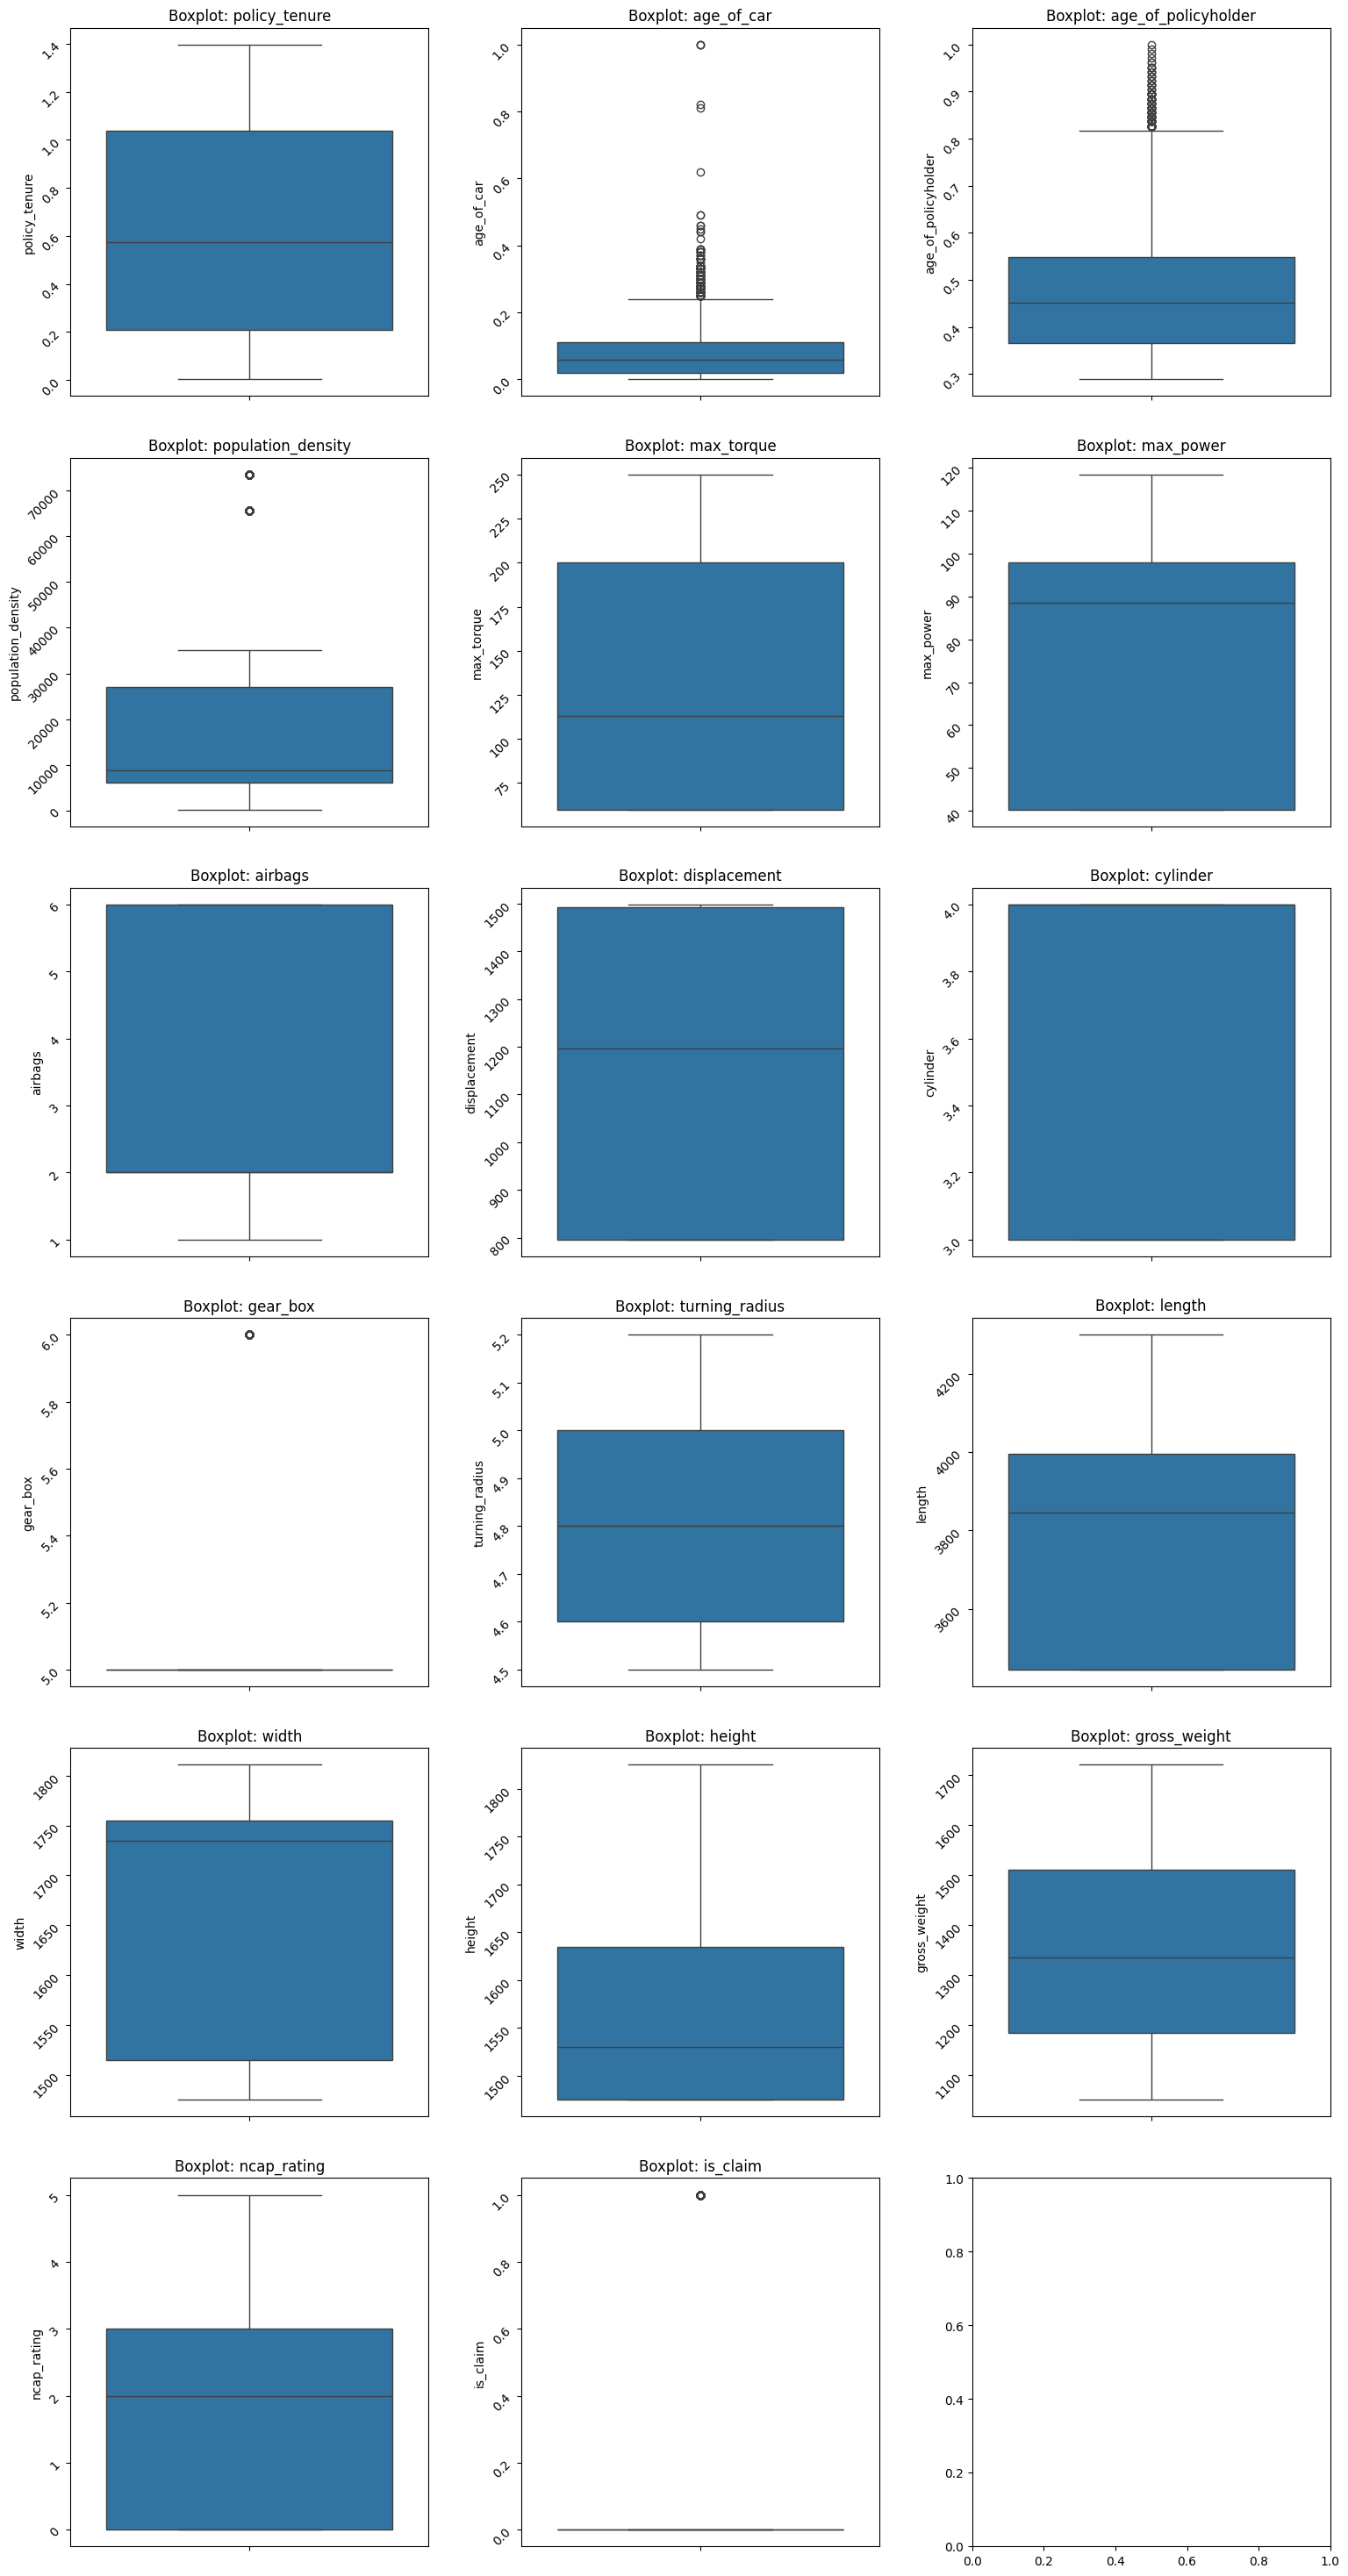

In [36]:
data = ['policy_tenure', 'age_of_car', 'age_of_policyholder','population_density','max_torque','max_power',
        'airbags','displacement','cylinder','gear_box','turning_radius','length','width','height','gross_weight',
        'ncap_rating','is_claim']

fig, axs = plt.subplots(6, 3, figsize=(16, 30))

for col, ax in zip(data, axs.flatten()):
    sns.boxplot(df[col], ax=ax)
    ax.set_title(f'Boxplot: {col}')
    ax.tick_params(rotation=45)

plt.tight_layout(pad=3)
plt.show()

**Iscrtavanje *pie plota*-a koji će nam reći udeo obe vrednosti ciljne varijable u njoj samoj ( *is_claim* : *True* ili *False* )**

Percentage of records per class: 
0    93.603222
1     6.396778
Name: is_claim, dtype: float64


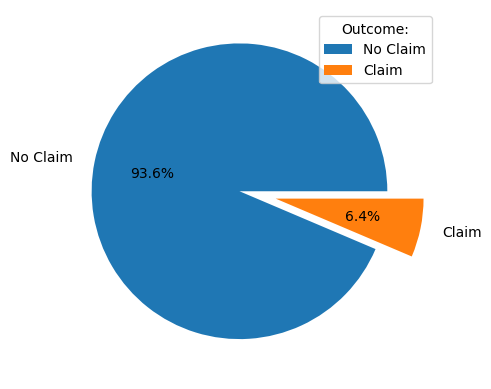

In [15]:
percentage_per_class = df['is_claim'].value_counts(normalize=True) * 100

print("Percentage of records per class: ")
print(percentage_per_class)

fig = plt.figure(facecolor='white')

ax = fig.add_subplot(1, 1, 1, facecolor='white')

plt.pie(df['is_claim'].value_counts(), labels=['No Claim', 'Claim'],
        autopct='%1.1f%%', explode=[0.1, 0.15], labeldistance=1.15)

plt.legend(title='Outcome:', loc='upper right')

plt.show()

**Ispisivanje korelacija između obeležja**

<ipython-input-16-5db9b1b682be>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corel = df.corr()


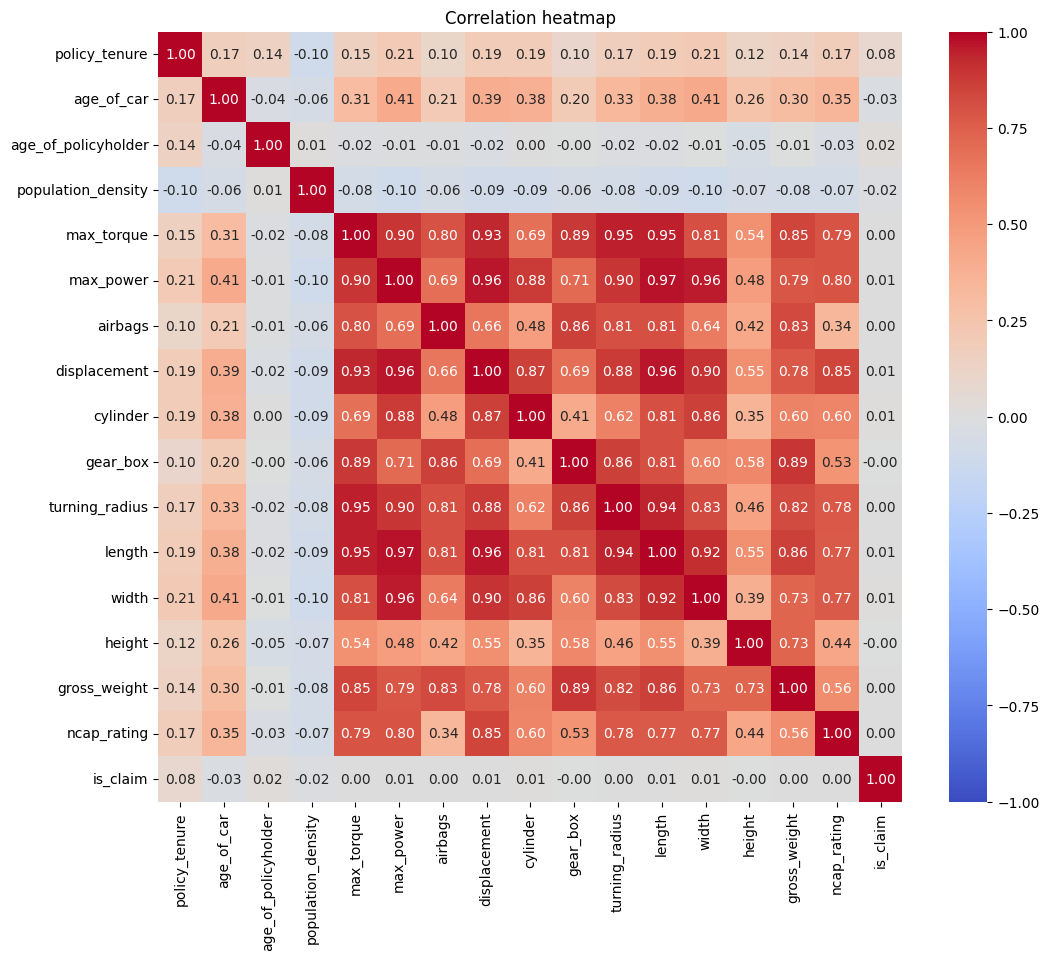

In [16]:
corel = df.corr()

# Kreiranje heatmap-a
plt.figure(figsize=(12, 10))
sns.heatmap(corel, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation heatmap")
plt.show()

**Iscrtavanje histograma za svako numeričko obeležje**

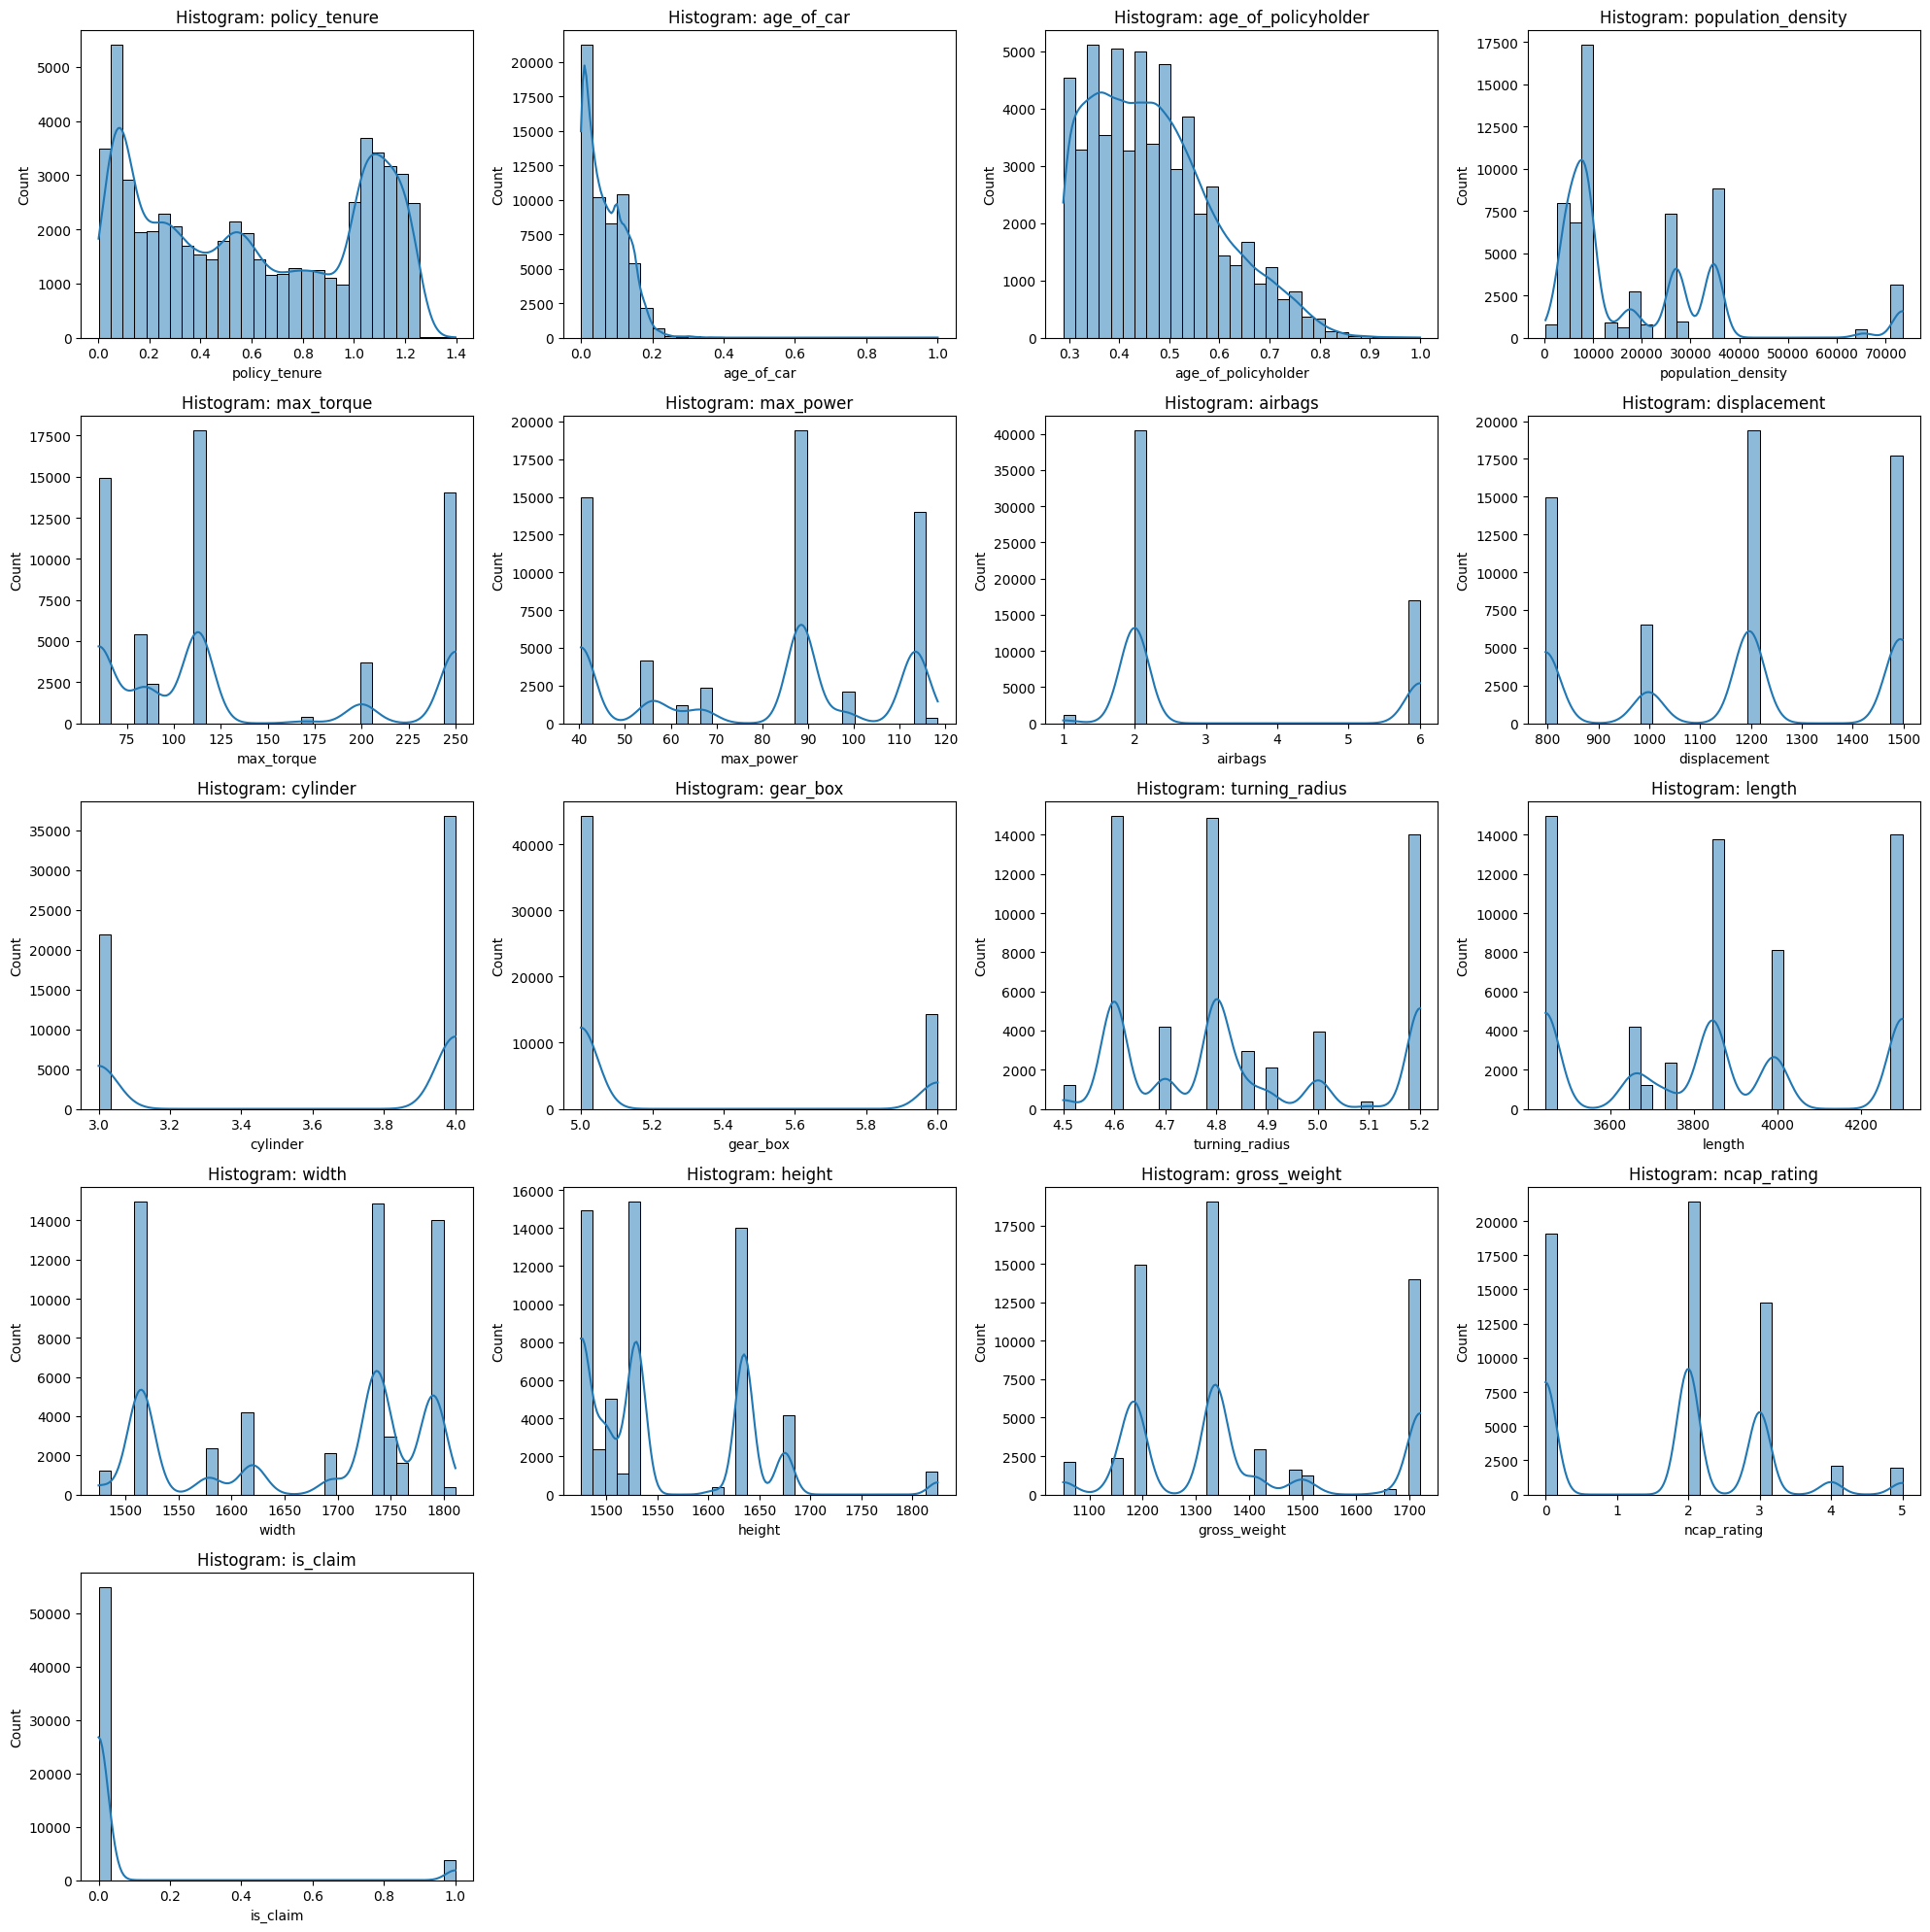

In [17]:
numerical_cols = df.select_dtypes(include=['int', 'float']).columns

num_features = len(numerical_cols)
num_cols = 4
num_rows = -(-num_features // num_cols)

plt.figure(figsize=(20, 4 * num_rows))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram: {col}')

plt.tight_layout()
plt.show()

# **Priprema za klasifiikaciju**

**Uvtrđivanje numeričkih obeležja**

In [18]:
numerical =  df.select_dtypes(include=['int', 'float'])
numerical

,policy_tenure,age_of_car,age_of_policyholder,population_density,max_torque,max_power,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
0,0.515874,0.05,0.644231,4990,60.0,40.36,2,796,3,5,4.6,3445,1515,1475,1185,0,0
1,0.672619,0.02,0.375000,27003,60.0,40.36,2,796,3,5,4.6,3445,1515,1475,1185,0,0
2,0.841110,0.02,0.384615,4076,60.0,40.36,2,796,3,5,4.6,3445,1515,1475,1185,0,0
3,0.900277,0.11,0.432692,21622,113.0,88.50,2,1197,4,5,4.8,3995,1735,1515,1335,2,0
4,0.596403,0.11,0.634615,34738,91.0,67.06,2,999,3,5,5.0,3731,1579,1490,1155,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,8794,91.0,67.06,2,999,3,5,5.0,3731,1579,1490,1155,2,0
58588,1.199642,0.02,0.519231,7788,60.0,40.36,2,796,3,5,4.6,3445,1515,1475,1185,0,0
58589,1.162273,0.05,0.451923,34738,60.0,40.36,2,796,3,5,4.6,3445,1515,1475,1185,0,0
58590,1.236307,0.14,0.557692,8794,113.0,88.50,2,1197,4,5,4.8,3845,1735,1530,1335,2,0


**Utvrđivanje kategoričkih obeležja**

In [19]:
categorical = df.select_dtypes(include=['object'])
categorical

,segment,fuel_type,engine_type,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,transmission_type,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,A,CNG,F8D Petrol Engine,No,No,No,Yes,No,Drum,Manual,...,No,No,No,No,No,Yes,No,No,No,Yes
1,A,CNG,F8D Petrol Engine,No,No,No,Yes,No,Drum,Manual,...,No,No,No,No,No,Yes,No,No,No,Yes
2,A,CNG,F8D Petrol Engine,No,No,No,Yes,No,Drum,Manual,...,No,No,No,No,No,Yes,No,No,No,Yes
3,C1,Petrol,1.2 L K12N Dualjet,Yes,Yes,No,Yes,Yes,Drum,Automatic,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,A,Petrol,1.0 SCe,No,No,No,No,Yes,Drum,Automatic,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,A,Petrol,1.0 SCe,No,No,No,No,Yes,Drum,Automatic,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
58588,A,CNG,F8D Petrol Engine,No,No,No,Yes,No,Drum,Manual,...,No,No,No,No,No,Yes,No,No,No,Yes
58589,A,CNG,F8D Petrol Engine,No,No,No,Yes,No,Drum,Manual,...,No,No,No,No,No,Yes,No,No,No,Yes
58590,B2,Petrol,K Series Dual jet,No,Yes,No,Yes,No,Drum,Manual,...,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


**Kreiranje dummy varijabli za kategorička obeležja**

In [20]:
categorical_dummies = pd.get_dummies(categorical)

In [21]:
categorical_dummies.columns

Index(['segment_A', 'segment_B1', 'segment_B2', 'segment_C1', 'segment_C2',
       'segment_Utility', 'fuel_type_CNG', 'fuel_type_Diesel',
       'fuel_type_Petrol', 'engine_type_1.0 SCe',
       'engine_type_1.2 L K Series Engine', 'engine_type_1.2 L K12N Dualjet',
       'engine_type_1.5 L U2 CRDi', 'engine_type_1.5 Turbocharged Revotorq',
       'engine_type_1.5 Turbocharged Revotron',
       'engine_type_F8D Petrol Engine', 'engine_type_G12B',
       'engine_type_K Series Dual jet', 'engine_type_K10C',
       'engine_type_i-DTEC', 'is_esc_No', 'is_esc_Yes',
       'is_adjustable_steering_No', 'is_adjustable_steering_Yes', 'is_tpms_No',
       'is_tpms_Yes', 'is_parking_sensors_No', 'is_parking_sensors_Yes',
       'is_parking_camera_No', 'is_parking_camera_Yes',
       'rear_brakes_type_Disc', 'rear_brakes_type_Drum',
       'transmission_type_Automatic', 'transmission_type_Manual',
       'steering_type_Electric', 'steering_type_Manual', 'steering_type_Power',
       'is_front_fog

**Uvezivanje nazad numeričkih i kategoričkih ( sada *dummy* ) obeležja**

In [22]:
df2 = pd.concat([categorical_dummies, numerical], axis=1)

In [23]:
df2.head()

,segment_A,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,fuel_type_CNG,fuel_type_Diesel,fuel_type_Petrol,engine_type_1.0 SCe,...,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
0,1,0,0,0,0,0,1,0,0,0,...,796,3,5,4.6,3445,1515,1475,1185,0,0
1,1,0,0,0,0,0,1,0,0,0,...,796,3,5,4.6,3445,1515,1475,1185,0,0
2,1,0,0,0,0,0,1,0,0,0,...,796,3,5,4.6,3445,1515,1475,1185,0,0
3,0,0,0,1,0,0,0,0,1,0,...,1197,4,5,4.8,3995,1735,1515,1335,2,0
4,1,0,0,0,0,0,0,0,1,1,...,999,3,5,5.0,3731,1579,1490,1155,2,0


**Svrstavanje u X sva obeležja, osim ciljne varijable koja ide u y**

In [24]:
X = df2.iloc[:, 0:76]
y = df2.iloc[:, 77]

In [25]:
X

,segment_A,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,fuel_type_CNG,fuel_type_Diesel,fuel_type_Petrol,engine_type_1.0 SCe,...,max_power,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight
0,1,0,0,0,0,0,1,0,0,0,...,40.36,2,796,3,5,4.6,3445,1515,1475,1185
1,1,0,0,0,0,0,1,0,0,0,...,40.36,2,796,3,5,4.6,3445,1515,1475,1185
2,1,0,0,0,0,0,1,0,0,0,...,40.36,2,796,3,5,4.6,3445,1515,1475,1185
3,0,0,0,1,0,0,0,0,1,0,...,88.50,2,1197,4,5,4.8,3995,1735,1515,1335
4,1,0,0,0,0,0,0,0,1,1,...,67.06,2,999,3,5,5.0,3731,1579,1490,1155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,1,0,0,0,0,0,0,0,1,1,...,67.06,2,999,3,5,5.0,3731,1579,1490,1155
58588,1,0,0,0,0,0,1,0,0,0,...,40.36,2,796,3,5,4.6,3445,1515,1475,1185
58589,1,0,0,0,0,0,1,0,0,0,...,40.36,2,796,3,5,4.6,3445,1515,1475,1185
58590,0,0,1,0,0,0,0,0,1,0,...,88.50,2,1197,4,5,4.8,3845,1735,1530,1335


In [26]:
y

0        0
1        0
2        0
3        0
4        0
        ..
58587    0
58588    0
58589    0
58590    0
58591    0
Name: is_claim, Length: 58592, dtype: int64

**Importovanje i inicijalizovanje SMOTE metode zarad balansiranja klasa**

In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

**Definisanje novih X i y vrednosti, dobijenih kao proizvod *over-sampling*-a**

In [28]:
X_smote,y_smote = smote.fit_resample(X,y)

**Deljenje *dataset*-a na set za treniranje i set za testiranje**

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)

# **GridSearchCV**

**Upoznavanje sa *Grid Search Cross* validacijom, na primeru sa kNN klasifikatorom.**



In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

params = {'n_neighbors':[1, 3, 5, 15, 35], 'metric':('euclidean', 'hamming', 'manhattan',  'minkowski', 'chebyshev')}

classifier = KNeighborsClassifier()
clf = GridSearchCV(classifier, params, scoring='f1', cv=5, verbose=3)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ...metric=euclidean, n_neighbors=1;, score=0.843 total time=  12.5s
[CV 2/5] END ...metric=euclidean, n_neighbors=1;, score=0.847 total time=  12.4s
[CV 3/5] END ...metric=euclidean, n_neighbors=1;, score=0.846 total time=  12.5s
[CV 4/5] END ...metric=euclidean, n_neighbors=1;, score=0.846 total time=  15.1s
[CV 5/5] END ...metric=euclidean, n_neighbors=1;, score=0.845 total time=  14.9s
[CV 1/5] END ...metric=euclidean, n_neighbors=3;, score=0.831 total time=  13.6s
[CV 2/5] END ...metric=euclidean, n_neighbors=3;, score=0.830 total time=  16.5s
[CV 3/5] END ...metric=euclidean, n_neighbors=3;, score=0.832 total time=  19.4s
[CV 4/5] END ...metric=euclidean, n_neighbors=3;, score=0.833 total time=  17.7s
[CV 5/5] END ...metric=euclidean, n_neighbors=3;, score=0.831 total time=  15.6s
[CV 1/5] END ...metric=euclidean, n_neighbors=5;, score=0.821 total time=  19.8s
[CV 2/5] END ...metric=euclidean, n_neighbors=5

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ('euclidean', 'hamming', 'manhattan',
                                    'minkowski', 'chebyshev'),
                         'n_neighbors': [1, 3, 5, 15, 35]},
             scoring='f1', verbose=3)

# **kNN nad početnim skupom ( bez standardizacije i normalizacije )**
**kNN klasifikator sa jednim susedom i Manhattan metrikom bez standardizacije i normalizacije**

In [38]:
clf.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

**Obučavanje modela**

In [40]:
knn = clf.best_estimator_
knn.fit(X_train, y_train)
y_predicted = knn.predict(X_test)

**Importovanje metrike i ispis rezultata prethodnog modela**

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85     10969
           1       0.82      0.91      0.86     10969

    accuracy                           0.86     21938
   macro avg       0.86      0.86      0.86     21938
weighted avg       0.86      0.86      0.86     21938



# **kNN sa uvedenom standardizacijom**


In [42]:
s = StandardScaler()
s.fit(X_train)
X_train_std = s.transform(X_train)
X_test_std = s.transform(X_test)

X_train_std = pd.DataFrame(X_train_std)
X_test_std = pd.DataFrame(X_test_std)

X_train_std.columns = list(X_smote.columns)
X_test_std.columns = list(X_smote.columns)

knn.fit(X_train_std, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

**Obučavanje modela**

In [43]:
knn.fit(X_train_std, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

**Testiranje modela i ispis rezultata**

In [44]:
y_predicted_standard = knn.predict(X_test_std)
print(classification_report(y_test, y_predicted_standard))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84     10969
           1       0.82      0.89      0.85     10969

    accuracy                           0.84     21938
   macro avg       0.85      0.84      0.84     21938
weighted avg       0.85      0.84      0.84     21938



# **kNN sa uvedenom normalizacijom**


In [45]:
for x in X_train.columns:
  X_train[x] = (X_train[x] - X_train[x].min()) / (X_train[x].max() - X_train[x].min())

for x in X_test.columns:
  X_test[x] = (X_test[x] - X_test[x].min()) / (X_test[x].max() - X_test[x].min())

**Obučavanje modela**

In [46]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

**Testiranje modela i ispis rezultata**

In [47]:
y_predicted = knn.predict(X_test_std)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.51      0.91      0.66     10969
           1       0.60      0.13      0.22     10969

    accuracy                           0.52     21938
   macro avg       0.56      0.52      0.44     21938
weighted avg       0.56      0.52      0.44     21938



# **Stabla odluke**

**Određivanje hiperparametara stabla odluke**

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

tree_clas = DecisionTreeClassifier(random_state = 1024)
param_grid_trees = {'max_features': [None,'auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.0, 0.1, .01, .001],
              'max_depth' : [None, 3, 5, 7, 9],
              'criterion' :['gini', 'entropy']
             }
grid_search_trees = GridSearchCV(estimator=tree_clas, param_grid=param_grid_trees, cv=5, verbose=3, scoring = 'f1')
grid_search_trees.fit(X_train,y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV 1/5] END ccp_alpha=0.0, criterion=gini, max_depth=None, max_features=None;, score=0.912 total time=   1.9s
[CV 2/5] END ccp_alpha=0.0, criterion=gini, max_depth=None, max_features=None;, score=0.906 total time=   1.5s
[CV 3/5] END ccp_alpha=0.0, criterion=gini, max_depth=None, max_features=None;, score=0.907 total time=   1.5s
[CV 4/5] END ccp_alpha=0.0, criterion=gini, max_depth=None, max_features=None;, score=0.909 total time=   1.3s
[CV 5/5] END ccp_alpha=0.0, criterion=gini, max_depth=None, max_features=None;, score=0.910 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.0, criterion=gini, max_depth=None, max_features=auto;, score=0.830 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.0, criterion=gini, max_depth=None, max_features=auto;, score=0.819 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END ccp_alpha=0.0, criterion=gini, max_depth=None, max_features=auto;, score=0.829 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.0, criterion=gini, max_depth=None, max_features=auto;, score=0.823 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END ccp_alpha=0.0, criterion=gini, max_depth=None, max_features=auto;, score=0.815 total time=   0.3s
[CV 1/5] END ccp_alpha=0.0, criterion=gini, max_depth=None, max_features=sqrt;, score=0.830 total time=   0.3s
[CV 2/5] END ccp_alpha=0.0, criterion=gini, max_depth=None, max_features=sqrt;, score=0.819 total time=   0.3s
[CV 3/5] END ccp_alpha=0.0, criterion=gini, max_depth=None, max_features=sqrt;, score=0.829 total time=   0.3s
[CV 4/5] END ccp_alpha=0.0, criterion=gini, max_depth=None, max_features=sqrt;, score=0.823 total time=   0.3s
[CV 5/5] END ccp_alpha=0.0, criterion=gini, max_depth=None, max_features=sqrt;, score=0.815 total time=   0.4s
[CV 1/5] END ccp_alpha=0.0, criterion=gini, max_depth=None, max_features=log2;, score=0.844 total time=   0.3s
[CV 2/5] END ccp_alpha=0.0, criterion=gini, max_depth=None, max_features=log2;, score=0.828 total time=   0.4s
[CV 3/5] END ccp_alpha=0.0, criterion=gini, max_depth=None, max_features=log2;, score=0.832 total time=   0.5s
[

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.0, criterion=gini, max_depth=3, max_features=auto;, score=0.654 total time=   0.1s
[CV 3/5] END ccp_alpha=0.0, criterion=gini, max_depth=3, max_features=auto;, score=0.655 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.0, criterion=gini, max_depth=3, max_features=auto;, score=0.652 total time=   0.1s
[CV 5/5] END ccp_alpha=0.0, criterion=gini, max_depth=3, max_features=auto;, score=0.654 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.0, criterion=gini, max_depth=3, max_features=sqrt;, score=0.651 total time=   0.1s
[CV 2/5] END ccp_alpha=0.0, criterion=gini, max_depth=3, max_features=sqrt;, score=0.654 total time=   0.1s
[CV 3/5] END ccp_alpha=0.0, criterion=gini, max_depth=3, max_features=sqrt;, score=0.655 total time=   0.1s
[CV 4/5] END ccp_alpha=0.0, criterion=gini, max_depth=3, max_features=sqrt;, score=0.652 total time=   0.1s
[CV 5/5] END ccp_alpha=0.0, criterion=gini, max_depth=3, max_features=sqrt;, score=0.654 total time=   0.1s
[CV 1/5] END ccp_alpha=0.0, criterion=gini, max_depth=3, max_features=log2;, score=0.569 total time=   0.1s
[CV 2/5] END ccp_alpha=0.0, criterion=gini, max_depth=3, max_features=log2;, score=0.576 total time=   0.1s
[CV 3/5] END ccp_alpha=0.0, criterion=gini, max_depth=3, max_features=log2;, score=0.574 total time=   0.1s
[CV 4/5] END ccp_alpha=0.0, criterion=gini, max_depth=3, max_features=log2;, score=0.665 total time=   0.1s
[CV 5/5] END ccp_alpha=0.0, 

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.0, criterion=gini, max_depth=5, max_features=auto;, score=0.665 total time=   0.1s
[CV 3/5] END ccp_alpha=0.0, criterion=gini, max_depth=5, max_features=auto;, score=0.673 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.0, criterion=gini, max_depth=5, max_features=auto;, score=0.666 total time=   0.1s
[CV 5/5] END ccp_alpha=0.0, criterion=gini, max_depth=5, max_features=auto;, score=0.679 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.0, criterion=gini, max_depth=5, max_features=sqrt;, score=0.660 total time=   0.1s
[CV 2/5] END ccp_alpha=0.0, criterion=gini, max_depth=5, max_features=sqrt;, score=0.665 total time=   0.1s
[CV 3/5] END ccp_alpha=0.0, criterion=gini, max_depth=5, max_features=sqrt;, score=0.673 total time=   0.1s
[CV 4/5] END ccp_alpha=0.0, criterion=gini, max_depth=5, max_features=sqrt;, score=0.666 total time=   0.1s
[CV 5/5] END ccp_alpha=0.0, criterion=gini, max_depth=5, max_features=sqrt;, score=0.679 total time=   0.1s
[CV 1/5] END ccp_alpha=0.0, criterion=gini, max_depth=5, max_features=log2;, score=0.650 total time=   0.1s
[CV 2/5] END ccp_alpha=0.0, criterion=gini, max_depth=5, max_features=log2;, score=0.558 total time=   0.1s
[CV 3/5] END ccp_alpha=0.0, criterion=gini, max_depth=5, max_features=log2;, score=0.664 total time=   0.1s
[CV 4/5] END ccp_alpha=0.0, criterion=gini, max_depth=5, max_features=log2;, score=0.637 total time=   0.1s
[CV 5/5] END ccp_alpha=0.0, 

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.0, criterion=gini, max_depth=7, max_features=auto;, score=0.654 total time=   0.2s
[CV 3/5] END ccp_alpha=0.0, criterion=gini, max_depth=7, max_features=auto;, score=0.701 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.0, criterion=gini, max_depth=7, max_features=auto;, score=0.658 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END ccp_alpha=0.0, criterion=gini, max_depth=7, max_features=auto;, score=0.655 total time=   0.2s
[CV 1/5] END ccp_alpha=0.0, criterion=gini, max_depth=7, max_features=sqrt;, score=0.675 total time=   0.2s
[CV 2/5] END ccp_alpha=0.0, criterion=gini, max_depth=7, max_features=sqrt;, score=0.654 total time=   0.2s
[CV 3/5] END ccp_alpha=0.0, criterion=gini, max_depth=7, max_features=sqrt;, score=0.701 total time=   0.2s
[CV 4/5] END ccp_alpha=0.0, criterion=gini, max_depth=7, max_features=sqrt;, score=0.658 total time=   0.2s
[CV 5/5] END ccp_alpha=0.0, criterion=gini, max_depth=7, max_features=sqrt;, score=0.655 total time=   0.2s
[CV 1/5] END ccp_alpha=0.0, criterion=gini, max_depth=7, max_features=log2;, score=0.662 total time=   0.2s
[CV 2/5] END ccp_alpha=0.0, criterion=gini, max_depth=7, max_features=log2;, score=0.577 total time=   0.2s
[CV 3/5] END ccp_alpha=0.0, criterion=gini, max_depth=7, max_features=log2;, score=0.662 total time=   0.2s
[CV 4/5] END ccp_alpha=0.0, 

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.0, criterion=gini, max_depth=9, max_features=auto;, score=0.689 total time=   0.2s
[CV 3/5] END ccp_alpha=0.0, criterion=gini, max_depth=9, max_features=auto;, score=0.680 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.0, criterion=gini, max_depth=9, max_features=auto;, score=0.703 total time=   0.2s
[CV 5/5] END ccp_alpha=0.0, criterion=gini, max_depth=9, max_features=auto;, score=0.692 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.0, criterion=gini, max_depth=9, max_features=sqrt;, score=0.683 total time=   0.2s
[CV 2/5] END ccp_alpha=0.0, criterion=gini, max_depth=9, max_features=sqrt;, score=0.689 total time=   0.2s
[CV 3/5] END ccp_alpha=0.0, criterion=gini, max_depth=9, max_features=sqrt;, score=0.680 total time=   0.2s
[CV 4/5] END ccp_alpha=0.0, criterion=gini, max_depth=9, max_features=sqrt;, score=0.703 total time=   0.2s
[CV 5/5] END ccp_alpha=0.0, criterion=gini, max_depth=9, max_features=sqrt;, score=0.692 total time=   0.2s
[CV 1/5] END ccp_alpha=0.0, criterion=gini, max_depth=9, max_features=log2;, score=0.669 total time=   0.1s
[CV 2/5] END ccp_alpha=0.0, criterion=gini, max_depth=9, max_features=log2;, score=0.672 total time=   0.2s
[CV 3/5] END ccp_alpha=0.0, criterion=gini, max_depth=9, max_features=log2;, score=0.679 total time=   0.2s
[CV 4/5] END ccp_alpha=0.0, criterion=gini, max_depth=9, max_features=log2;, score=0.677 total time=   0.2s
[CV 5/5] END ccp_alpha=0.0, 

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.0, criterion=entropy, max_depth=None, max_features=auto;, score=0.829 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.0, criterion=entropy, max_depth=None, max_features=auto;, score=0.827 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END ccp_alpha=0.0, criterion=entropy, max_depth=None, max_features=auto;, score=0.824 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.0, criterion=entropy, max_depth=None, max_features=auto;, score=0.818 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END ccp_alpha=0.0, criterion=entropy, max_depth=None, max_features=auto;, score=0.822 total time=   0.4s
[CV 1/5] END ccp_alpha=0.0, criterion=entropy, max_depth=None, max_features=sqrt;, score=0.829 total time=   0.4s
[CV 2/5] END ccp_alpha=0.0, criterion=entropy, max_depth=None, max_features=sqrt;, score=0.827 total time=   0.4s
[CV 3/5] END ccp_alpha=0.0, criterion=entropy, max_depth=None, max_features=sqrt;, score=0.824 total time=   0.4s
[CV 4/5] END ccp_alpha=0.0, criterion=entropy, max_depth=None, max_features=sqrt;, score=0.818 total time=   0.3s
[CV 5/5] END ccp_alpha=0.0, criterion=entropy, max_depth=None, max_features=sqrt;, score=0.822 total time=   0.4s
[CV 1/5] END ccp_alpha=0.0, criterion=entropy, max_depth=None, max_features=log2;, score=0.834 total time=   0.4s
[CV 2/5] END ccp_alpha=0.0, criterion=entropy, max_depth=None, max_features=log2;, score=0.837 total time=   0.4s
[CV 3/5] END ccp_alpha=0.0, criterion=entropy, max_depth=None, max_features=log2;, score

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.0, criterion=entropy, max_depth=3, max_features=auto;, score=0.654 total time=   0.2s
[CV 3/5] END ccp_alpha=0.0, criterion=entropy, max_depth=3, max_features=auto;, score=0.655 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.0, criterion=entropy, max_depth=3, max_features=auto;, score=0.652 total time=   0.2s
[CV 5/5] END ccp_alpha=0.0, criterion=entropy, max_depth=3, max_features=auto;, score=0.654 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.0, criterion=entropy, max_depth=3, max_features=sqrt;, score=0.651 total time=   0.2s
[CV 2/5] END ccp_alpha=0.0, criterion=entropy, max_depth=3, max_features=sqrt;, score=0.654 total time=   0.1s
[CV 3/5] END ccp_alpha=0.0, criterion=entropy, max_depth=3, max_features=sqrt;, score=0.655 total time=   0.2s
[CV 4/5] END ccp_alpha=0.0, criterion=entropy, max_depth=3, max_features=sqrt;, score=0.652 total time=   0.1s
[CV 5/5] END ccp_alpha=0.0, criterion=entropy, max_depth=3, max_features=sqrt;, score=0.654 total time=   0.2s
[CV 1/5] END ccp_alpha=0.0, criterion=entropy, max_depth=3, max_features=log2;, score=0.576 total time=   0.1s
[CV 2/5] END ccp_alpha=0.0, criterion=entropy, max_depth=3, max_features=log2;, score=0.576 total time=   0.1s
[CV 3/5] END ccp_alpha=0.0, criterion=entropy, max_depth=3, max_features=log2;, score=0.574 total time=   0.1s
[CV 4/5] END ccp_alpha=0.0, criterion=entropy, max_depth=3, max_features=log2;, score=0.665 total time=   0.1s
[

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.0, criterion=entropy, max_depth=5, max_features=auto;, score=0.667 total time=   0.1s
[CV 3/5] END ccp_alpha=0.0, criterion=entropy, max_depth=5, max_features=auto;, score=0.673 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.0, criterion=entropy, max_depth=5, max_features=auto;, score=0.665 total time=   0.1s
[CV 5/5] END ccp_alpha=0.0, criterion=entropy, max_depth=5, max_features=auto;, score=0.679 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.0, criterion=entropy, max_depth=5, max_features=sqrt;, score=0.662 total time=   0.1s
[CV 2/5] END ccp_alpha=0.0, criterion=entropy, max_depth=5, max_features=sqrt;, score=0.667 total time=   0.1s
[CV 3/5] END ccp_alpha=0.0, criterion=entropy, max_depth=5, max_features=sqrt;, score=0.673 total time=   0.1s
[CV 4/5] END ccp_alpha=0.0, criterion=entropy, max_depth=5, max_features=sqrt;, score=0.665 total time=   0.1s
[CV 5/5] END ccp_alpha=0.0, criterion=entropy, max_depth=5, max_features=sqrt;, score=0.679 total time=   0.2s
[CV 1/5] END ccp_alpha=0.0, criterion=entropy, max_depth=5, max_features=log2;, score=0.664 total time=   0.1s
[CV 2/5] END ccp_alpha=0.0, criterion=entropy, max_depth=5, max_features=log2;, score=0.558 total time=   0.1s
[CV 3/5] END ccp_alpha=0.0, criterion=entropy, max_depth=5, max_features=log2;, score=0.664 total time=   0.1s
[CV 4/5] END ccp_alpha=0.0, criterion=entropy, max_depth=5, max_features=log2;, score=0.637 total time=   0.1s
[

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.0, criterion=entropy, max_depth=7, max_features=auto;, score=0.697 total time=   0.2s
[CV 3/5] END ccp_alpha=0.0, criterion=entropy, max_depth=7, max_features=auto;, score=0.700 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.0, criterion=entropy, max_depth=7, max_features=auto;, score=0.686 total time=   0.2s
[CV 5/5] END ccp_alpha=0.0, criterion=entropy, max_depth=7, max_features=auto;, score=0.684 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.0, criterion=entropy, max_depth=7, max_features=sqrt;, score=0.686 total time=   0.2s
[CV 2/5] END ccp_alpha=0.0, criterion=entropy, max_depth=7, max_features=sqrt;, score=0.697 total time=   0.2s
[CV 3/5] END ccp_alpha=0.0, criterion=entropy, max_depth=7, max_features=sqrt;, score=0.700 total time=   0.2s
[CV 4/5] END ccp_alpha=0.0, criterion=entropy, max_depth=7, max_features=sqrt;, score=0.686 total time=   0.2s
[CV 5/5] END ccp_alpha=0.0, criterion=entropy, max_depth=7, max_features=sqrt;, score=0.684 total time=   0.2s
[CV 1/5] END ccp_alpha=0.0, criterion=entropy, max_depth=7, max_features=log2;, score=0.681 total time=   0.1s
[CV 2/5] END ccp_alpha=0.0, criterion=entropy, max_depth=7, max_features=log2;, score=0.606 total time=   0.1s
[CV 3/5] END ccp_alpha=0.0, criterion=entropy, max_depth=7, max_features=log2;, score=0.674 total time=   0.2s
[CV 4/5] END ccp_alpha=0.0, criterion=entropy, max_depth=7, max_features=log2;, score=0.672 total time=   0.2s
[

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.0, criterion=entropy, max_depth=9, max_features=auto;, score=0.691 total time=   0.2s
[CV 3/5] END ccp_alpha=0.0, criterion=entropy, max_depth=9, max_features=auto;, score=0.694 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.0, criterion=entropy, max_depth=9, max_features=auto;, score=0.694 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END ccp_alpha=0.0, criterion=entropy, max_depth=9, max_features=auto;, score=0.701 total time=   0.2s
[CV 1/5] END ccp_alpha=0.0, criterion=entropy, max_depth=9, max_features=sqrt;, score=0.678 total time=   0.2s
[CV 2/5] END ccp_alpha=0.0, criterion=entropy, max_depth=9, max_features=sqrt;, score=0.691 total time=   0.2s
[CV 3/5] END ccp_alpha=0.0, criterion=entropy, max_depth=9, max_features=sqrt;, score=0.694 total time=   0.2s
[CV 4/5] END ccp_alpha=0.0, criterion=entropy, max_depth=9, max_features=sqrt;, score=0.694 total time=   0.2s
[CV 5/5] END ccp_alpha=0.0, criterion=entropy, max_depth=9, max_features=sqrt;, score=0.701 total time=   0.2s
[CV 1/5] END ccp_alpha=0.0, criterion=entropy, max_depth=9, max_features=log2;, score=0.677 total time=   0.1s
[CV 2/5] END ccp_alpha=0.0, criterion=entropy, max_depth=9, max_features=log2;, score=0.675 total time=   0.2s
[CV 3/5] END ccp_alpha=0.0, criterion=entropy, max_depth=9, max_features=log2;, score=0.669 total time=   0.1s
[

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=None, max_features=auto;, score=0.000 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=None, max_features=auto;, score=0.000 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=None, max_features=auto;, score=0.000 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=None, max_features=auto;, score=0.000 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END ccp_alpha=0.1, criterion=gini, max_depth=None, max_features=auto;, score=0.000 total time=   1.1s
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=None, max_features=sqrt;, score=0.000 total time=   1.0s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=None, max_features=sqrt;, score=0.000 total time=   1.0s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=None, max_features=sqrt;, score=0.000 total time=   1.0s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=None, max_features=sqrt;, score=0.000 total time=   1.1s
[CV 5/5] END ccp_alpha=0.1, criterion=gini, max_depth=None, max_features=sqrt;, score=0.000 total time=   1.5s
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=None, max_features=log2;, score=0.000 total time=   1.1s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=None, max_features=log2;, score=0.000 total time=   1.0s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=None, max_features=log2;, score=0.000 total time=   1.0s
[

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=3, max_features=auto;, score=0.000 total time=   0.1s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=3, max_features=auto;, score=0.000 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=3, max_features=auto;, score=0.000 total time=   0.1s
[CV 5/5] END ccp_alpha=0.1, criterion=gini, max_depth=3, max_features=auto;, score=0.000 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=3, max_features=sqrt;, score=0.000 total time=   0.1s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=3, max_features=sqrt;, score=0.000 total time=   0.1s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=3, max_features=sqrt;, score=0.000 total time=   0.1s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=3, max_features=sqrt;, score=0.000 total time=   0.1s
[CV 5/5] END ccp_alpha=0.1, criterion=gini, max_depth=3, max_features=sqrt;, score=0.000 total time=   0.1s
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=3, max_features=log2;, score=0.000 total time=   0.1s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=3, max_features=log2;, score=0.000 total time=   0.1s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=3, max_features=log2;, score=0.000 total time=   0.1s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=3, max_features=log2;, score=0.000 total time=   0.1s
[CV 5/5] END ccp_alpha=0.1, 

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=0.000 total time=   0.1s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=0.000 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=0.000 total time=   0.1s
[CV 5/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=0.000 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt;, score=0.000 total time=   0.1s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt;, score=0.000 total time=   0.2s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt;, score=0.000 total time=   0.2s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt;, score=0.000 total time=   0.2s
[CV 5/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt;, score=0.000 total time=   0.2s
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=log2;, score=0.000 total time=   0.1s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=log2;, score=0.000 total time=   0.1s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=log2;, score=0.000 total time=   0.1s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=log2;, score=0.000 total time=   0.2s
[CV 5/5] END ccp_alpha=0.1, 

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=7, max_features=auto;, score=0.000 total time=   0.2s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=7, max_features=auto;, score=0.000 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=7, max_features=auto;, score=0.000 total time=   0.2s
[CV 5/5] END ccp_alpha=0.1, criterion=gini, max_depth=7, max_features=auto;, score=0.000 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=7, max_features=sqrt;, score=0.000 total time=   0.2s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=7, max_features=sqrt;, score=0.000 total time=   0.2s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=7, max_features=sqrt;, score=0.000 total time=   0.2s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=7, max_features=sqrt;, score=0.000 total time=   0.2s
[CV 5/5] END ccp_alpha=0.1, criterion=gini, max_depth=7, max_features=sqrt;, score=0.000 total time=   0.2s
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=7, max_features=log2;, score=0.000 total time=   0.1s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=7, max_features=log2;, score=0.000 total time=   0.1s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=7, max_features=log2;, score=0.000 total time=   0.1s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=7, max_features=log2;, score=0.000 total time=   0.2s
[CV 5/5] END ccp_alpha=0.1, 

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=9, max_features=auto;, score=0.000 total time=   0.2s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=9, max_features=auto;, score=0.000 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=9, max_features=auto;, score=0.000 total time=   0.2s
[CV 5/5] END ccp_alpha=0.1, criterion=gini, max_depth=9, max_features=auto;, score=0.000 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=9, max_features=sqrt;, score=0.000 total time=   0.2s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=9, max_features=sqrt;, score=0.000 total time=   0.2s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=9, max_features=sqrt;, score=0.000 total time=   0.2s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=9, max_features=sqrt;, score=0.000 total time=   0.2s
[CV 5/5] END ccp_alpha=0.1, criterion=gini, max_depth=9, max_features=sqrt;, score=0.000 total time=   0.2s
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=9, max_features=log2;, score=0.000 total time=   0.1s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=9, max_features=log2;, score=0.000 total time=   0.2s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=9, max_features=log2;, score=0.000 total time=   0.2s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=9, max_features=log2;, score=0.000 total time=   0.2s
[CV 5/5] END ccp_alpha=0.1, 

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.1, criterion=entropy, max_depth=None, max_features=auto;, score=0.000 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.1, criterion=entropy, max_depth=None, max_features=auto;, score=0.000 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END ccp_alpha=0.1, criterion=entropy, max_depth=None, max_features=auto;, score=0.000 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.1, criterion=entropy, max_depth=None, max_features=auto;, score=0.000 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END ccp_alpha=0.1, criterion=entropy, max_depth=None, max_features=auto;, score=0.000 total time=   1.1s
[CV 1/5] END ccp_alpha=0.1, criterion=entropy, max_depth=None, max_features=sqrt;, score=0.000 total time=   1.1s
[CV 2/5] END ccp_alpha=0.1, criterion=entropy, max_depth=None, max_features=sqrt;, score=0.000 total time=   1.1s
[CV 3/5] END ccp_alpha=0.1, criterion=entropy, max_depth=None, max_features=sqrt;, score=0.000 total time=   1.1s
[CV 4/5] END ccp_alpha=0.1, criterion=entropy, max_depth=None, max_features=sqrt;, score=0.000 total time=   1.1s
[CV 5/5] END ccp_alpha=0.1, criterion=entropy, max_depth=None, max_features=sqrt;, score=0.000 total time=   1.1s
[CV 1/5] END ccp_alpha=0.1, criterion=entropy, max_depth=None, max_features=log2;, score=0.000 total time=   1.0s
[CV 2/5] END ccp_alpha=0.1, criterion=entropy, max_depth=None, max_features=log2;, score=0.000 total time=   1.0s
[CV 3/5] END ccp_alpha=0.1, criterion=entropy, max_depth=None, max_features=log2;, score

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.1, criterion=entropy, max_depth=3, max_features=auto;, score=0.000 total time=   0.1s
[CV 3/5] END ccp_alpha=0.1, criterion=entropy, max_depth=3, max_features=auto;, score=0.000 total time=   0.1s
[CV 4/5] END ccp_alpha=0.1, criterion=entropy, max_depth=3, max_features=auto;, score=0.000 total time=   0.1s

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(



[CV 5/5] END ccp_alpha=0.1, criterion=entropy, max_depth=3, max_features=auto;, score=0.000 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.1, criterion=entropy, max_depth=3, max_features=sqrt;, score=0.000 total time=   0.1s
[CV 2/5] END ccp_alpha=0.1, criterion=entropy, max_depth=3, max_features=sqrt;, score=0.000 total time=   0.1s
[CV 3/5] END ccp_alpha=0.1, criterion=entropy, max_depth=3, max_features=sqrt;, score=0.000 total time=   0.1s
[CV 4/5] END ccp_alpha=0.1, criterion=entropy, max_depth=3, max_features=sqrt;, score=0.000 total time=   0.1s
[CV 5/5] END ccp_alpha=0.1, criterion=entropy, max_depth=3, max_features=sqrt;, score=0.000 total time=   0.1s
[CV 1/5] END ccp_alpha=0.1, criterion=entropy, max_depth=3, max_features=log2;, score=0.000 total time=   0.1s
[CV 2/5] END ccp_alpha=0.1, criterion=entropy, max_depth=3, max_features=log2;, score=0.000 total time=   0.1s
[CV 3/5] END ccp_alpha=0.1, criterion=entropy, max_depth=3, max_features=log2;, score=0.000 total time=   0.1s
[CV 4/5] END ccp_alpha=0.1, criterion=entropy, max_depth=3, max_features=log2;, score=0.000 total time=   0.1s
[

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.1, criterion=entropy, max_depth=5, max_features=auto;, score=0.000 total time=   0.1s
[CV 3/5] END ccp_alpha=0.1, criterion=entropy, max_depth=5, max_features=auto;, score=0.000 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.1, criterion=entropy, max_depth=5, max_features=auto;, score=0.000 total time=   0.1s
[CV 5/5] END ccp_alpha=0.1, criterion=entropy, max_depth=5, max_features=auto;, score=0.000 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.1, criterion=entropy, max_depth=5, max_features=sqrt;, score=0.000 total time=   0.1s
[CV 2/5] END ccp_alpha=0.1, criterion=entropy, max_depth=5, max_features=sqrt;, score=0.000 total time=   0.1s
[CV 3/5] END ccp_alpha=0.1, criterion=entropy, max_depth=5, max_features=sqrt;, score=0.000 total time=   0.1s
[CV 4/5] END ccp_alpha=0.1, criterion=entropy, max_depth=5, max_features=sqrt;, score=0.000 total time=   0.1s
[CV 5/5] END ccp_alpha=0.1, criterion=entropy, max_depth=5, max_features=sqrt;, score=0.000 total time=   0.1s
[CV 1/5] END ccp_alpha=0.1, criterion=entropy, max_depth=5, max_features=log2;, score=0.000 total time=   0.1s
[CV 2/5] END ccp_alpha=0.1, criterion=entropy, max_depth=5, max_features=log2;, score=0.000 total time=   0.1s
[CV 3/5] END ccp_alpha=0.1, criterion=entropy, max_depth=5, max_features=log2;, score=0.000 total time=   0.1s
[CV 4/5] END ccp_alpha=0.1, criterion=entropy, max_depth=5, max_features=log2;, score=0.000 total time=   0.1s
[

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=auto;, score=0.000 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=auto;, score=0.000 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=auto;, score=0.000 total time=   0.2s
[CV 4/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=auto;, score=0.000 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=auto;, score=0.000 total time=   0.2s
[CV 1/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=sqrt;, score=0.000 total time=   0.1s
[CV 2/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=sqrt;, score=0.000 total time=   0.1s
[CV 3/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=sqrt;, score=0.000 total time=   0.1s
[CV 4/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=sqrt;, score=0.000 total time=   0.2s
[CV 5/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=sqrt;, score=0.000 total time=   0.1s
[CV 1/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=log2;, score=0.000 total time=   0.1s
[CV 2/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=log2;, score=0.000 total time=   0.1s
[CV 3/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=log2;, score=0.000 total time=   0.1s
[

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.1, criterion=entropy, max_depth=9, max_features=auto;, score=0.000 total time=   0.2s
[CV 3/5] END ccp_alpha=0.1, criterion=entropy, max_depth=9, max_features=auto;, score=0.000 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.1, criterion=entropy, max_depth=9, max_features=auto;, score=0.000 total time=   0.2s
[CV 5/5] END ccp_alpha=0.1, criterion=entropy, max_depth=9, max_features=auto;, score=0.000 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.1, criterion=entropy, max_depth=9, max_features=sqrt;, score=0.000 total time=   0.2s
[CV 2/5] END ccp_alpha=0.1, criterion=entropy, max_depth=9, max_features=sqrt;, score=0.000 total time=   0.1s
[CV 3/5] END ccp_alpha=0.1, criterion=entropy, max_depth=9, max_features=sqrt;, score=0.000 total time=   0.2s
[CV 4/5] END ccp_alpha=0.1, criterion=entropy, max_depth=9, max_features=sqrt;, score=0.000 total time=   0.2s
[CV 5/5] END ccp_alpha=0.1, criterion=entropy, max_depth=9, max_features=sqrt;, score=0.000 total time=   0.2s
[CV 1/5] END ccp_alpha=0.1, criterion=entropy, max_depth=9, max_features=log2;, score=0.000 total time=   0.1s
[CV 2/5] END ccp_alpha=0.1, criterion=entropy, max_depth=9, max_features=log2;, score=0.000 total time=   0.1s
[CV 3/5] END ccp_alpha=0.1, criterion=entropy, max_depth=9, max_features=log2;, score=0.000 total time=   0.1s
[CV 4/5] END ccp_alpha=0.1, criterion=entropy, max_depth=9, max_features=log2;, score=0.000 total time=   0.1s
[

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_depth=None, max_features=auto;, score=0.649 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_depth=None, max_features=auto;, score=0.653 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_depth=None, max_features=auto;, score=0.655 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_depth=None, max_features=auto;, score=0.651 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_depth=None, max_features=auto;, score=0.653 total time=   1.1s
[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_depth=None, max_features=sqrt;, score=0.649 total time=   1.0s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_depth=None, max_features=sqrt;, score=0.653 total time=   1.4s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_depth=None, max_features=sqrt;, score=0.655 total time=   1.4s
[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_depth=None, max_features=sqrt;, score=0.651 total time=   1.0s
[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_depth=None, max_features=sqrt;, score=0.653 total time=   1.1s
[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_depth=None, max_features=log2;, score=0.000 total time=   0.8s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_depth=None, max_features=log2;, score=0.000 total time=   0.9s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_depth=None, max_features=log2;, score=0.000 total time=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_depth=3, max_features=auto;, score=0.655 total time=   0.1s
[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_depth=3, max_features=auto;, score=0.651 total time=   0.1s
[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_depth=3, max_features=auto;, score=0.653 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_depth=3, max_features=sqrt;, score=0.649 total time=   0.1s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_depth=3, max_features=sqrt;, score=0.653 total time=   0.1s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_depth=3, max_features=sqrt;, score=0.655 total time=   0.1s
[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_depth=3, max_features=sqrt;, score=0.651 total time=   0.1s
[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_depth=3, max_features=sqrt;, score=0.653 total time=   0.1s
[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_depth=3, max_features=log2;, score=0.000 total time=   0.1s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_depth=3, max_features=log2;, score=0.000 total time=   0.1s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_depth=3, max_features=log2;, score=0.000 total time=   0.1s
[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_depth=3, max_features=log2;, score=0.000 total time=   0.1s
[CV 5/5] END ccp_al

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_depth=5, max_features=auto;, score=0.653 total time=   0.1s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_depth=5, max_features=auto;, score=0.655 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_depth=5, max_features=auto;, score=0.651 total time=   0.1s
[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_depth=5, max_features=auto;, score=0.653 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_depth=5, max_features=sqrt;, score=0.649 total time=   0.1s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_depth=5, max_features=sqrt;, score=0.653 total time=   0.1s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_depth=5, max_features=sqrt;, score=0.655 total time=   0.1s
[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_depth=5, max_features=sqrt;, score=0.651 total time=   0.1s
[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_depth=5, max_features=sqrt;, score=0.653 total time=   0.1s
[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_depth=5, max_features=log2;, score=0.000 total time=   0.1s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_depth=5, max_features=log2;, score=0.000 total time=   0.1s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_depth=5, max_features=log2;, score=0.000 total time=   0.1s
[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_depth=5, max_features=log2;, score=0.000 total time=   0.1s
[CV 5/5] END ccp_al

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_depth=7, max_features=auto;, score=0.653 total time=   0.2s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_depth=7, max_features=auto;, score=0.655 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_depth=7, max_features=auto;, score=0.651 total time=   0.2s
[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_depth=7, max_features=auto;, score=0.653 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_depth=7, max_features=sqrt;, score=0.649 total time=   0.2s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_depth=7, max_features=sqrt;, score=0.653 total time=   0.2s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_depth=7, max_features=sqrt;, score=0.655 total time=   0.2s
[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_depth=7, max_features=sqrt;, score=0.651 total time=   0.2s
[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_depth=7, max_features=sqrt;, score=0.653 total time=   0.2s
[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_depth=7, max_features=log2;, score=0.000 total time=   0.1s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_depth=7, max_features=log2;, score=0.000 total time=   0.1s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_depth=7, max_features=log2;, score=0.000 total time=   0.1s
[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_depth=7, max_features=log2;, score=0.000 total time=   0.1s
[CV 5/5] END ccp_al

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_depth=9, max_features=auto;, score=0.649 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_depth=9, max_features=auto;, score=0.653 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_depth=9, max_features=auto;, score=0.655 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_depth=9, max_features=auto;, score=0.651 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_depth=9, max_features=auto;, score=0.653 total time=   0.2s
[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_depth=9, max_features=sqrt;, score=0.649 total time=   0.2s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_depth=9, max_features=sqrt;, score=0.653 total time=   0.2s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_depth=9, max_features=sqrt;, score=0.655 total time=   0.2s
[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_depth=9, max_features=sqrt;, score=0.651 total time=   0.2s
[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_depth=9, max_features=sqrt;, score=0.653 total time=   0.2s
[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_depth=9, max_features=log2;, score=0.000 total time=   0.1s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_depth=9, max_features=log2;, score=0.000 total time=   0.1s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_depth=9, max_features=log2;, score=0.000 total time=   0.1s
[CV 4/5] END ccp_al

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_depth=None, max_features=auto;, score=0.649 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_depth=None, max_features=auto;, score=0.653 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_depth=None, max_features=auto;, score=0.655 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_depth=None, max_features=auto;, score=0.651 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_depth=None, max_features=auto;, score=0.653 total time=   1.1s
[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_depth=None, max_features=sqrt;, score=0.649 total time=   1.0s
[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_depth=None, max_features=sqrt;, score=0.653 total time=   1.0s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_depth=None, max_features=sqrt;, score=0.655 total time=   1.1s
[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_depth=None, max_features=sqrt;, score=0.651 total time=   1.1s
[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_depth=None, max_features=sqrt;, score=0.653 total time=   1.1s
[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_depth=None, max_features=log2;, score=0.672 total time=   1.1s
[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_depth=None, max_features=log2;, score=0.672 total time=   1.4s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_depth=None, max_features=log

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_depth=3, max_features=auto;, score=0.653 total time=   0.1s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_depth=3, max_features=auto;, score=0.655 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_depth=3, max_features=auto;, score=0.651 total time=   0.1s
[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_depth=3, max_features=auto;, score=0.653 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_depth=3, max_features=sqrt;, score=0.649 total time=   0.1s
[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_depth=3, max_features=sqrt;, score=0.653 total time=   0.1s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_depth=3, max_features=sqrt;, score=0.655 total time=   0.1s
[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_depth=3, max_features=sqrt;, score=0.651 total time=   0.1s
[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_depth=3, max_features=sqrt;, score=0.653 total time=   0.1s
[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_depth=3, max_features=log2;, score=0.672 total time=   0.1s
[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_depth=3, max_features=log2;, score=0.672 total time=   0.1s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_depth=3, max_features=log2;, score=0.672 total time=   0.1s
[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_depth=3, max_features=log2;, score=0.671 total time=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_depth=5, max_features=auto;, score=0.653 total time=   0.1s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_depth=5, max_features=auto;, score=0.655 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_depth=5, max_features=auto;, score=0.651 total time=   0.2s
[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_depth=5, max_features=auto;, score=0.653 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_depth=5, max_features=sqrt;, score=0.649 total time=   0.1s
[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_depth=5, max_features=sqrt;, score=0.653 total time=   0.1s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_depth=5, max_features=sqrt;, score=0.655 total time=   0.1s
[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_depth=5, max_features=sqrt;, score=0.651 total time=   0.1s
[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_depth=5, max_features=sqrt;, score=0.653 total time=   0.1s
[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_depth=5, max_features=log2;, score=0.672 total time=   0.1s
[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_depth=5, max_features=log2;, score=0.672 total time=   0.1s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_depth=5, max_features=log2;, score=0.672 total time=   0.1s
[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_depth=5, max_features=log2;, score=0.671 total time=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_depth=7, max_features=auto;, score=0.653 total time=   0.2s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_depth=7, max_features=auto;, score=0.655 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_depth=7, max_features=auto;, score=0.651 total time=   0.2s
[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_depth=7, max_features=auto;, score=0.653 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_depth=7, max_features=sqrt;, score=0.649 total time=   0.2s
[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_depth=7, max_features=sqrt;, score=0.653 total time=   0.1s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_depth=7, max_features=sqrt;, score=0.655 total time=   0.1s
[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_depth=7, max_features=sqrt;, score=0.651 total time=   0.2s
[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_depth=7, max_features=sqrt;, score=0.653 total time=   0.1s
[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_depth=7, max_features=log2;, score=0.672 total time=   0.1s
[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_depth=7, max_features=log2;, score=0.672 total time=   0.1s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_depth=7, max_features=log2;, score=0.672 total time=   0.1s
[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_depth=7, max_features=log2;, score=0.671 total time=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_depth=9, max_features=auto;, score=0.653 total time=   0.2s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_depth=9, max_features=auto;, score=0.655 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_depth=9, max_features=auto;, score=0.651 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_depth=9, max_features=auto;, score=0.653 total time=   0.2s
[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_depth=9, max_features=sqrt;, score=0.649 total time=   0.2s
[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_depth=9, max_features=sqrt;, score=0.653 total time=   0.2s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_depth=9, max_features=sqrt;, score=0.655 total time=   0.2s
[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_depth=9, max_features=sqrt;, score=0.651 total time=   0.2s
[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_depth=9, max_features=sqrt;, score=0.653 total time=   0.2s
[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_depth=9, max_features=log2;, score=0.672 total time=   0.2s
[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_depth=9, max_features=log2;, score=0.672 total time=   0.1s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_depth=9, max_features=log2;, score=0.672 total time=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_depth=None, max_features=auto;, score=0.680 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_depth=None, max_features=auto;, score=0.683 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_depth=None, max_features=auto;, score=0.693 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_depth=None, max_features=auto;, score=0.685 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_depth=None, max_features=auto;, score=0.686 total time=   1.5s
[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_depth=None, max_features=sqrt;, score=0.680 total time=   1.2s
[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_depth=None, max_features=sqrt;, score=0.683 total time=   1.0s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_depth=None, max_features=sqrt;, score=0.693 total time=   1.1s
[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_depth=None, max_features=sqrt;, score=0.685 total time=   1.1s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_depth=None, max_features=sqrt;, score=0.686 total time=   1.1s
[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_depth=None, max_features=log2;, score=0.679 total time=   0.9s
[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_depth=None, max_features=log2;, score=0.705 total time=   1.0s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_depth=None, max_features=log2;, score=0.651 to

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_depth=3, max_features=auto;, score=0.653 total time=   0.1s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_depth=3, max_features=auto;, score=0.655 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_depth=3, max_features=auto;, score=0.651 total time=   0.1s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_depth=3, max_features=auto;, score=0.653 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_depth=3, max_features=sqrt;, score=0.649 total time=   0.1s
[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_depth=3, max_features=sqrt;, score=0.653 total time=   0.1s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_depth=3, max_features=sqrt;, score=0.655 total time=   0.1s
[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_depth=3, max_features=sqrt;, score=0.651 total time=   0.1s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_depth=3, max_features=sqrt;, score=0.653 total time=   0.1s
[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_depth=3, max_features=log2;, score=0.665 total time=   0.1s
[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_depth=3, max_features=log2;, score=0.671 total time=   0.1s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_depth=3, max_features=log2;, score=0.667 total time=   0.1s
[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_depth=3, max_features=log2;, score=0.665 total time=   0.1s
[CV 5/5] E

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=auto;, score=0.686 total time=   0.1s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=auto;, score=0.688 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=auto;, score=0.684 total time=   0.1s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=auto;, score=0.652 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=sqrt;, score=0.684 total time=   0.1s
[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=sqrt;, score=0.686 total time=   0.1s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=sqrt;, score=0.688 total time=   0.1s
[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=sqrt;, score=0.684 total time=   0.1s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=sqrt;, score=0.652 total time=   0.1s
[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=log2;, score=0.658 total time=   0.1s
[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=log2;, score=0.673 total time=   0.1s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=log2;, score=0.669 total time=   0.1s
[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=log2;, score=0.594 total time=   0.1s
[CV 5/5] E

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_depth=7, max_features=auto;, score=0.688 total time=   0.2s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_depth=7, max_features=auto;, score=0.694 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_depth=7, max_features=auto;, score=0.637 total time=   0.2s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_depth=7, max_features=auto;, score=0.624 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_depth=7, max_features=sqrt;, score=0.680 total time=   0.2s
[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_depth=7, max_features=sqrt;, score=0.688 total time=   0.2s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_depth=7, max_features=sqrt;, score=0.694 total time=   0.2s
[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_depth=7, max_features=sqrt;, score=0.637 total time=   0.2s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_depth=7, max_features=sqrt;, score=0.624 total time=   0.2s
[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_depth=7, max_features=log2;, score=0.657 total time=   0.1s
[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_depth=7, max_features=log2;, score=0.671 total time=   0.1s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_depth=7, max_features=log2;, score=0.667 total time=   0.1s
[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_depth=7, max_features=log2;, score=0.667 total time=   0.1s
[CV 5/5] E

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=auto;, score=0.682 total time=   0.2s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=auto;, score=0.677 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=auto;, score=0.681 total time=   0.2s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=auto;, score=0.688 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=sqrt;, score=0.682 total time=   0.2s
[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=sqrt;, score=0.682 total time=   0.2s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=sqrt;, score=0.677 total time=   0.2s
[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=sqrt;, score=0.681 total time=   0.2s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=sqrt;, score=0.688 total time=   0.2s
[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=log2;, score=0.643 total time=   0.1s
[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=log2;, score=0.666 total time=   0.1s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=log2;, score=0.678 total time=   0.2s
[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=log2;, score=0.664 total time=   0.1s
[CV 5/5] E

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_depth=None, max_features=auto;, score=0.667 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_depth=None, max_features=auto;, score=0.689 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_depth=None, max_features=auto;, score=0.687 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_depth=None, max_features=auto;, score=0.678 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_depth=None, max_features=auto;, score=0.692 total time=   1.1s
[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_depth=None, max_features=sqrt;, score=0.667 total time=   1.1s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_depth=None, max_features=sqrt;, score=0.689 total time=   1.1s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_depth=None, max_features=sqrt;, score=0.687 total time=   1.6s
[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_depth=None, max_features=sqrt;, score=0.678 total time=   1.4s
[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_depth=None, max_features=sqrt;, score=0.692 total time=   1.1s
[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_depth=None, max_features=log2;, score=0.680 total time=   1.0s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_depth=None, max_features=log2;, score=0.685 total time=   1.0s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_depth=None, max_fea

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(



[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_depth=3, max_features=auto;, score=0.655 total time=   0.1s
[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_depth=3, max_features=auto;, score=0.652 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_depth=3, max_features=auto;, score=0.654 total time=   0.1s
[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_depth=3, max_features=sqrt;, score=0.651 total time=   0.1s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_depth=3, max_features=sqrt;, score=0.654 total time=   0.1s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_depth=3, max_features=sqrt;, score=0.655 total time=   0.1s
[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_depth=3, max_features=sqrt;, score=0.652 total time=   0.1s
[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_depth=3, max_features=sqrt;, score=0.654 total time=   0.1s
[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_depth=3, max_features=log2;, score=0.670 total time=   0.1s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_depth=3, max_features=log2;, score=0.671 total time=   0.1s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_depth=3, max_features=log2;, score=0.667 to

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_depth=5, max_features=auto;, score=0.686 total time=   0.1s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_depth=5, max_features=auto;, score=0.688 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_depth=5, max_features=auto;, score=0.684 total time=   0.1s
[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_depth=5, max_features=auto;, score=0.652 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_depth=5, max_features=sqrt;, score=0.684 total time=   0.1s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_depth=5, max_features=sqrt;, score=0.686 total time=   0.1s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_depth=5, max_features=sqrt;, score=0.688 total time=   0.1s
[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_depth=5, max_features=sqrt;, score=0.684 total time=   0.1s
[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_depth=5, max_features=sqrt;, score=0.652 total time=   0.1s
[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_depth=5, max_features=log2;, score=0.663 total time=   0.1s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_depth=5, max_features=log2;, score=0.673 total time=   0.1s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_depth=5, max_features=log2;, score=0.669 total time=   0.1s
[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_depth=5, max_features=log2;, score=0.594 to

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=auto;, score=0.699 total time=   0.2s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=auto;, score=0.700 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=auto;, score=0.684 total time=   0.2s
[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=auto;, score=0.658 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=sqrt;, score=0.678 total time=   0.2s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=sqrt;, score=0.699 total time=   0.2s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=sqrt;, score=0.700 total time=   0.2s
[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=sqrt;, score=0.684 total time=   0.2s
[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=sqrt;, score=0.658 total time=   0.2s
[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=log2;, score=0.677 total time=   0.1s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=log2;, score=0.589 total time=   0.1s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=log2;, score=0.575 total time=   0.1s
[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=log2;, score=0.667 to

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=auto;, score=0.688 total time=   0.2s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=auto;, score=0.669 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=auto;, score=0.678 total time=   0.2s
[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=auto;, score=0.686 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt;, score=0.662 total time=   0.2s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt;, score=0.688 total time=   0.2s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt;, score=0.669 total time=   0.2s
[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt;, score=0.678 total time=   0.2s
[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt;, score=0.686 total time=   0.2s
[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=log2;, score=0.671 total time=   0.1s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=log2;, score=0.678 total time=   0.2s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=log2;, score=0.664 total time=   0.2s
[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=log2;, score=0.680 to

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.0, 0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 7, 9],
                         'max_features': [None, 'auto', 'sqrt', 'log2']},
             scoring='f1', verbose=3)

**Obučavanje modela**

In [ ]:
dec_tree = grid_search_trees.best_estimator_
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1024)

**Testiranje modela i ispis rezultata**

In [ ]:
y_predicted_tree = dec_tree.predict(X_test)
print(classification_report(y_test, y_predicted_tree))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88     10969
           1       0.88      0.90      0.89     10969

    accuracy                           0.89     21938
   macro avg       0.89      0.89      0.89     21938
weighted avg       0.89      0.89      0.89     21938



# **Naivni Bajesov klasifikator**

**Određivanje hiperparamtera modela**

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_clas = GaussianNB()

In [ ]:
param_grid_nb = {'var_smoothing': np.logspace(0, -9, num=300)}
grid_search_nb = GridSearchCV(estimator=naive_clas,
                 param_grid=param_grid_nb,
                 cv=3,
                 verbose=1,
                 scoring='f1')

grid_search_nb.fit(X_train,y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e-09, 1.14868426e-09, 1.31947552e-09, 1.51566076e-09,
       1.74101565e-09, 1.99987727e-09, 2.29722754e-09, 2.63878910e-09,
       3.03113550e-09, 3.48181763e-09, 3.99950910e-09, 4.59417313e-09,
       5.27725435e-09, 6.06189899e-09, 6.96320794e-09, 7.99852734e-09,
       9.18778243e-09, 1.05538610e-08, 1.21...
       4.12462638e+07, 4.73789339e+07, 5.44234355e+07, 6.25153435e+07,
       7.18103909e+07, 8.24874655e+07, 9.47520530e+07, 1.08840192e+08,
       1.25023015e+08, 1.43611969e+08, 1.64964807e+08, 1.89492477e+08,
       2.17667025e+08, 2.50030685e+08, 2.87206312e+08, 3.29909369e+08,
       3.78961698e+08, 4.35307336e+08, 5.00030684e+08, 5.74377375e+08,
       6.59778248e+08, 7.57876886e+08, 8.70561248e+08, 1.00000000e+09])},
             scoring='f1', verbose=1)

**Obučavanje modela**

In [ ]:
naive_bayes_clasificator = grid_search_nb.best_estimator_
naive_bayes_clasificator.fit(X_train,y_train)

GaussianNB()

**Testiranje modela i ispis rezultata**

In [ ]:
y_predicted_nb = naive_bayes_clasificator.predict(X_test)
print(classification_report(y_test,y_predicted_nb))

              precision    recall  f1-score   support

           0       0.53      0.27      0.36     10969
           1       0.51      0.76      0.61     10969

    accuracy                           0.51     21938
   macro avg       0.52      0.51      0.48     21938
weighted avg       0.52      0.51      0.48     21938



# **PCA + kNN**

**Utvrđivanje optimalnog broja PCA komponenti i ujedno hiperparametara kNN klasifikatora, koristeći Pipeline**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [ ]:
pipeline_pca_knn = Pipeline([
    ('pca', PCA()),
    ('knn', KNeighborsClassifier())
])

param_grid_pca_knn = {
    'pca__n_components': [2, 5, 10, 20, 30],
    'knn__n_neighbors' : [1, 3, 5, 25, 45, 7],
    'knn__metric' : ['euclidean', 'hamming', 'manhattan',  'minkowski', 'chebyshev']
}

grid_search_pca_knn = GridSearchCV(pipeline_pca_knn, param_grid_pca_knn, scoring = 'f1', cv=5, verbose = 3)
grid_search_pca_knn.fit(X_train_std,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END knn__metric=euclidean, knn__n_neighbors=1, pca__n_components=2;, score=0.598 total time=   4.3s
[CV 2/5] END knn__metric=euclidean, knn__n_neighbors=1, pca__n_components=2;, score=0.590 total time=   1.8s
[CV 3/5] END knn__metric=euclidean, knn__n_neighbors=1, pca__n_components=2;, score=0.591 total time=   1.5s
[CV 4/5] END knn__metric=euclidean, knn__n_neighbors=1, pca__n_components=2;, score=0.592 total time=   1.8s
[CV 5/5] END knn__metric=euclidean, knn__n_neighbors=1, pca__n_components=2;, score=0.588 total time=   2.2s
[CV 1/5] END knn__metric=euclidean, knn__n_neighbors=1, pca__n_components=5;, score=0.704 total time=   2.2s
[CV 2/5] END knn__metric=euclidean, knn__n_neighbors=1, pca__n_components=5;, score=0.711 total time=   2.6s
[CV 3/5] END knn__metric=euclidean, knn__n_neighbors=1, pca__n_components=5;, score=0.706 total time=   1.9s
[CV 4/5] END knn__metric=euclidean, knn__n_neighbors=1, pca__n_co

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'hamming', 'manhattan',
                                         'minkowski', 'chebyshev'],
                         'knn__n_neighbors': [1, 3, 5, 25, 45, 7],
                         'pca__n_components': [2, 5, 10, 20, 30]},
             scoring='f1', verbose=3)

**Obučavanje modela**

In [ ]:
pca_knn = grid_search_pca_knn.best_estimator_
pca_knn.fit(X_train_std, y_train)

Pipeline(steps=[('pca', PCA(n_components=20)),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

**Testiranje modela i ispis rezultata**

In [ ]:
y_predicted_pca_knn = pca_knn.predict(X_test_std)
print(classification_report(y_test, y_predicted_pca_knn))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81     10969
           1       0.79      0.88      0.83     10969

    accuracy                           0.82     21938
   macro avg       0.82      0.82      0.82     21938
weighted avg       0.82      0.82      0.82     21938



# **PCA + Stabla odluke**

**Utvrđivanje optimalnog broja PCA komponenti i ujedno hiperparametara Stabla odluka**

In [ ]:
pipeline__trees = Pipeline([
    ('pca', PCA()),
    ('tree', DecisionTreeClassifier())
])

In [ ]:
param_grid_pca_trees = {
              'pca__n_components': [2, 5, 10, 20, 30],
              'tree__max_features': [None,'auto', 'sqrt', 'log2'],
              'tree__ccp_alpha': [0.0, 0.1, .01, .001],
              'tree__max_depth' : [None, 3, 5, 7, 9],
              'tree__criterion' :['gini', 'entropy']
             }

In [ ]:
grid_search_pca_trees = GridSearchCV(pipeline__trees, param_grid_pca_trees, scoring = 'f1', cv=5, verbose = 3)
grid_search_pca_trees.fit(X_train_std,y_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=None;, score=0.574 total time=   1.7s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=None;, score=0.569 total time=   1.2s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=None;, score=0.568 total time=   1.4s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=None;, score=0.564 total time=   1.4s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=None;, score=0.569 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.575 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.569 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.566 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.566 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.560 total time=   1.1s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.573 total time=   1.0s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.572 total time=   0.9s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.568 total time=   1.1s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.568 total time=   2.1s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.568 total time=   1.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__cri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.578 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.579 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.587 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.526 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.547 total time=   0.7s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.578 total time=   0.8s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.537 total time=   0.7s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.595 total time=   0.6s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.583 total time=   0.6s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.579 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.508 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.595 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.583 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.581 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.594 total time=   0.8s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.558 total time=   0.9s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.577 total time=   0.7s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.592 total time=   0.6s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.565 total time=   0.6s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.596 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.580 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.569 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.595 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.567 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.573 total time=   1.4s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.567 total time=   1.3s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.591 total time=   1.9s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.585 total time=   1.2s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.599 total time=   0.9s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.575 total time=   1.0s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.567 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.589 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.555 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.593 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.564 total time=   1.9s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.569 total time=   1.0s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.587 total time=   0.7s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.592 total time=   0.6s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.589 total time=   0.7s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.561 total time=   0.7s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=gini, tree_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.570 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.571 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.569 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.566 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.567 total time=   0.9s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.576 total time=   0.9s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.569 total time=   0.9s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.559 total time=   1.3s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.566 total time=   1.4s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.564 total time=   1.6s
[CV 1/5] END pca__n_components=2, tree__ccp_al

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.580 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.583 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.542 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.582 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.583 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.576 total time=   0.6s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.582 total time=   0.6s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.547 total time=   0.6s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.531 total time=   0.6s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.587 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__cri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.500 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.592 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.587 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.587 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.589 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.562 total time=   0.6s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.559 total time=   0.6s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.592 total time=   0.6s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.549 total time=   0.6s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.573 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__cri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.566 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.590 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.592 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.582 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.573 total time=   1.1s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.564 total time=   1.0s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.582 total time=   1.0s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.564 total time=   1.7s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.577 total time=   1.5s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.582 total time=   1.0s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__cri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.565 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.556 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.586 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.600 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.574 total time=   0.7s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.561 total time=   0.7s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.579 total time=   0.7s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.586 total time=   0.7s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.530 total time=   0.7s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.565 total time=   1.0s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.0, tree__cri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.9s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.9s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   3.0s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   3.4s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.8s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.9s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__cri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.5s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.5s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=gini, tree_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.7s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.7s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.7s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   3.5s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.6s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.7s
[CV 1/5] END pca__n_components=2, tree__ccp_al

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__cri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__cri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__cri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.7s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.1, tree__cri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.9s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.8s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.8s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   3.5s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   3.0s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.8s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.01, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=gini

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.7s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.7s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.7s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   3.0s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   3.2s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.7s
[CV 1/5] END pca__n_components=2, tree__

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.8s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.01, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.8s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.01, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.01, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.7s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.01, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.575 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.585 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.592 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.536 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.577 total time=   3.3s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.566 total time=   2.9s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.588 total time=   3.1s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.586 total time=   3.9s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.573 total time=   3.0s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.591 total time=   2.9s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.581 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.540 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.554 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.536 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.542 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.568 total time=   0.6s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.585 total time=   0.6s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.592 total time=   0.6s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.526 total time=   0.6s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.667 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criteri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.573 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.586 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.591 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.477 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.542 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.573 total time=   0.6s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.587 total time=   0.6s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.590 total time=   0.6s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.477 total time=   0.6s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.521 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criteri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.573 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.592 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.592 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.571 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.547 total time=   0.7s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.572 total time=   0.6s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.585 total time=   0.6s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.590 total time=   0.6s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.547 total time=   0.7s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.580 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criteri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.573 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.585 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.593 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.582 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.580 total time=   0.7s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.575 total time=   0.7s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.578 total time=   0.7s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.584 total time=   0.6s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.573 total time=   0.6s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.577 total time=   0.7s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criteri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.566 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.540 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.578 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.601 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.564 total time=   2.7s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.566 total time=   2.7s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.596 total time=   2.6s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.582 total time=   3.2s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.585 total time=   2.9s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.582 total time=   2.7s
[CV 1/5] END pca__n_components=2, 

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.575 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.585 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.314 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.583 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.591 total time=   0.8s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.580 total time=   0.6s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.543 total time=   0.6s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.314 total time=   0.6s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.573 total time=   0.6s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.547 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.571 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.578 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.564 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.564 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.581 total time=   0.7s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.575 total time=   0.6s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.579 total time=   0.6s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.581 total time=   0.6s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.576 total time=   0.6s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.580 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.571 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.589 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.576 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.586 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.579 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.573 total time=   0.6s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.572 total time=   0.6s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.584 total time=   0.7s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.570 total time=   0.6s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.587 total time=   0.6s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.573 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.578 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.598 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.580 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.580 total time=   0.7s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.582 total time=   0.7s
[CV 2/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.579 total time=   0.7s
[CV 3/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.582 total time=   0.7s
[CV 4/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.583 total time=   0.7s
[CV 5/5] END pca__n_components=2, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.574 total time=   0.7s
[CV 1/5] END pca__n_components=2, tree__ccp_alpha=0.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.636 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.638 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.640 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.643 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.636 total time=   1.1s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.637 total time=   1.1s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.636 total time=   1.1s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.639 total time=   1.1s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.641 total time=   1.1s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.638 total time=   1.0s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__cri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.443 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.663 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.542 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.535 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.547 total time=   0.7s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.580 total time=   0.7s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.521 total time=   0.7s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.519 total time=   0.7s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.545 total time=   0.8s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.591 total time=   0.9s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.571 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.476 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.587 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.563 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.534 total time=   1.1s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.604 total time=   1.1s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.490 total time=   0.9s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.495 total time=   0.8s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.524 total time=   0.8s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.606 total time=   0.8s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.587 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.589 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.601 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.564 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.573 total time=   0.8s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.608 total time=   0.8s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.559 total time=   0.8s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.579 total time=   0.8s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.532 total time=   0.8s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.603 total time=   0.8s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.598 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.582 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.550 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.596 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.578 total time=   1.1s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.602 total time=   1.1s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.552 total time=   1.2s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.623 total time=   0.9s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.592 total time=   0.8s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.550 total time=   0.8s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=gini, tree_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.638 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.640 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.645 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.635 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.631 total time=   1.8s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.644 total time=   1.3s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.637 total time=   1.3s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.638 total time=   1.4s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.638 total time=   1.3s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.635 total time=   1.2s
[CV 1/5] END pca__n_components=5, tree__ccp_al

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.585 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.450 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.491 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.513 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.547 total time=   0.7s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.536 total time=   0.8s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.578 total time=   1.0s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.460 total time=   1.0s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.411 total time=   0.8s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.542 total time=   0.7s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__cri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.542 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.539 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.558 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.579 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.623 total time=   0.8s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.572 total time=   0.8s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.565 total time=   0.8s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.578 total time=   0.8s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.549 total time=   0.8s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.527 total time=   0.8s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__cri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.574 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.590 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.587 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.590 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.595 total time=   0.9s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.579 total time=   0.8s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.567 total time=   0.8s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.587 total time=   1.0s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.590 total time=   1.2s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.542 total time=   1.1s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__cri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.573 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.558 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.596 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.579 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.605 total time=   0.9s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.604 total time=   0.9s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.601 total time=   0.9s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.627 total time=   0.8s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.595 total time=   0.9s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.596 total time=   0.9s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.0, tree__cri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.5s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.4s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.4s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.7s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.8s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.4s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__cri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   1.0s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   1.0s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.7s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.8s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.0s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.1s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.8s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=gini, tree_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.5s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.5s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.7s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   3.5s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   3.0s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.5s
[CV 1/5] END pca__n_components=5, tree__ccp_al

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.7s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__cri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.8s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__cri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.2s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.1s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__cri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.9s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.9s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.9s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.9s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.3s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.3s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.1, tree__cri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.4s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.4s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   3.0s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.6s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.5s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.8s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.01, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.7s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.8s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.9s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.1s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.1s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.8s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=gini

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.5s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.5s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.9s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.8s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.4s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.6s
[CV 1/5] END pca__n_components=5, tree__

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.7s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.01, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.8s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   1.1s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   1.1s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.01, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.8s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.9s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.01, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.9s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.2s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.3s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.9s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.9s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.9s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.01, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.506 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.593 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.520 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.600 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.497 total time=   2.4s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.572 total time=   2.8s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.559 total time=   2.7s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.593 total time=   2.4s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.408 total time=   2.3s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.478 total time=   2.4s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.454 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.507 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.407 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.553 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.401 total time=   0.7s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.459 total time=   0.7s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.447 total time=   0.7s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.663 total time=   0.7s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.481 total time=   0.7s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.665 total time=   0.7s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criteri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.573 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.519 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.663 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.547 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.418 total time=   0.8s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.572 total time=   0.7s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.438 total time=   0.7s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.590 total time=   0.9s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.578 total time=   1.0s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.541 total time=   1.0s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criteri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.579 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.588 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.546 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.547 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.578 total time=   0.9s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.559 total time=   0.8s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.579 total time=   0.8s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.442 total time=   0.8s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.542 total time=   0.8s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.542 total time=   0.7s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criteri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.570 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.541 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.560 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.543 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.578 total time=   0.8s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.572 total time=   0.8s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.579 total time=   0.8s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.542 total time=   0.8s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.501 total time=   0.8s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.542 total time=   0.9s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criteri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.590 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.565 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.557 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.592 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.605 total time=   2.5s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.543 total time=   2.5s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.596 total time=   3.3s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.598 total time=   2.5s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.494 total time=   2.6s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.616 total time=   2.5s
[CV 1/5] END pca__n_components=5, 

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.443 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.446 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.551 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.513 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.519 total time=   0.7s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.459 total time=   0.7s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.508 total time=   0.7s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.527 total time=   0.7s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.668 total time=   0.7s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.542 total time=   0.7s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.444 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.562 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.547 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.482 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.427 total time=   0.7s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.569 total time=   0.7s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.574 total time=   0.7s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.582 total time=   0.8s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.582 total time=   1.0s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.587 total time=   1.1s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.557 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.583 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.590 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.601 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.579 total time=   0.8s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.576 total time=   0.8s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.579 total time=   0.8s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.588 total time=   0.8s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.594 total time=   0.8s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.576 total time=   0.8s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.590 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.566 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.598 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.522 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.574 total time=   0.9s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.597 total time=   0.9s
[CV 2/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.577 total time=   1.1s
[CV 3/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.559 total time=   1.2s
[CV 4/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.577 total time=   1.1s
[CV 5/5] END pca__n_components=5, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.585 total time=   0.9s
[CV 1/5] END pca__n_components=5, tree__ccp_alpha=0.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.691 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.697 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.692 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.691 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.690 total time=   1.4s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.685 total time=   1.1s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.686 total time=   1.1s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.687 total time=   1.1s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.696 total time=   1.1s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.692 total time=   1.1s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.0, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.533 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.558 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.526 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.630 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.604 total time=   0.6s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.587 total time=   0.6s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.653 total time=   0.6s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.582 total time=   0.6s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.582 total time=   0.6s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.576 total time=   0.6s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.538 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.510 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.536 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.542 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.588 total time=   0.7s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.597 total time=   0.8s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.512 total time=   0.9s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.532 total time=   0.9s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.598 total time=   0.8s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.599 total time=   0.7s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.597 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.614 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.617 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.601 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.591 total time=   0.8s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.527 total time=   1.0s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.604 total time=   1.0s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.599 total time=   0.9s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.625 total time=   0.7s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.577 total time=   0.7s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.593 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.593 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.603 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.618 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.602 total time=   1.0s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.587 total time=   1.1s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.617 total time=   1.1s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.625 total time=   0.8s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.620 total time=   0.8s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.622 total time=   0.8s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=gini

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.691 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.693 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.685 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.697 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.689 total time=   1.4s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.692 total time=   1.4s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.697 total time=   1.7s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.678 total time=   1.9s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.694 total time=   1.3s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.686 total time=   1.4s
[CV 1/5] END pca__n_components=10, tree_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.503 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.600 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.602 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.510 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.542 total time=   0.6s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.638 total time=   0.6s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.558 total time=   0.6s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.478 total time=   0.6s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.574 total time=   0.6s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.621 total time=   0.6s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.0, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.567 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.539 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.634 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.574 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.526 total time=   1.0s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.583 total time=   1.0s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.585 total time=   1.0s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.591 total time=   0.7s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.478 total time=   0.7s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.574 total time=   0.7s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.0, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.626 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.537 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.569 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.513 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.531 total time=   0.8s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.607 total time=   0.8s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.496 total time=   0.8s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.504 total time=   0.8s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.606 total time=   0.8s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.552 total time=   1.1s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.0, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.623 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.599 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.590 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.651 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.598 total time=   0.9s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.616 total time=   0.9s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.560 total time=   0.9s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.583 total time=   0.9s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.625 total time=   0.9s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.633 total time=   0.9s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.0, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.1s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.1s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.1s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.7s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.3s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.2s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.1, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.6s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.7s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.7s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.9s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.0s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=gini

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.3s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.3s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.5s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.8s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.4s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.3s
[CV 1/5] END pca__n_components=10, tree_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.6s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.1, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.7s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.1, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.8s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.1, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   2.9s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   3.1s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   2.8s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   2.3s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.5s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.5s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.1, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.6s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.5s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.1s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.2s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.1s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.2s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   1.0s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.9s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.9s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.9s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   1.0s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criteri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.9s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   1.0s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   1.1s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   1.5s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.9s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.9s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criteri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.7s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.3s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.1s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.1s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   2.1s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.5s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criteri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.0s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criteri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.3s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.4s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   3.0s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.4s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.4s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.4s
[CV 1/5] END pca__n_components=10,

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.6s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.6s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.7s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.7s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.9s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   1.0s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   0.8s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   0.9s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.9s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.9s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.9s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.9s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   0.9s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.579 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.534 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.589 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.545 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.476 total time=   3.1s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.574 total time=   2.7s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.412 total time=   2.1s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.564 total time=   2.2s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.591 total time=   2.2s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.597 total time=   2.6s
[CV 1/5] END pca__n_components=10, tree__ccp_a

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.444 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.619 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.553 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.520 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.638 total time=   0.6s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.449 total time=   0.6s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.421 total time=   0.6s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.459 total time=   0.6s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.605 total time=   0.6s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.494 total time=   0.6s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.610 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.607 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.501 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.592 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.587 total time=   0.7s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.595 total time=   0.9s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.537 total time=   0.9s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.602 total time=   0.9s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.497 total time=   0.7s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.562 total time=   0.6s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.600 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.529 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.558 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.598 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.571 total time=   0.7s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.603 total time=   0.7s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.519 total time=   0.7s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.531 total time=   0.7s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.474 total time=   0.7s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.598 total time=   0.7s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.582 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.528 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.579 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.480 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.644 total time=   0.8s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.555 total time=   0.9s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.424 total time=   1.1s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.508 total time=   1.1s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.486 total time=   0.9s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.517 total time=   0.8s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.600 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.584 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.572 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.589 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.534 total time=   2.3s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.577 total time=   2.4s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.519 total time=   2.2s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.574 total time=   2.4s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.511 total time=   3.1s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.521 total time=   2.4s
[CV 1/5] END pca__n_componen

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.499 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.567 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.602 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.658 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.470 total time=   0.7s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.588 total time=   0.8s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.623 total time=   0.8s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.530 total time=   0.9s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.593 total time=   0.6s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.600 total time=   0.6s
[CV 1/5] END pca__n_components=10, tree__ccp_a

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.596 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.583 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.597 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.613 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.561 total time=   0.7s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.612 total time=   0.7s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.504 total time=   0.7s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.535 total time=   0.7s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.567 total time=   0.7s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.565 total time=   0.7s
[CV 1/5] END pca__n_components=10, tree__ccp_a

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.538 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.627 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.578 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.626 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.524 total time=   0.8s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.612 total time=   1.1s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.555 total time=   1.1s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.574 total time=   0.9s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.610 total time=   0.8s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.589 total time=   0.8s
[CV 1/5] END pca__n_components=10, tree__ccp_a

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.617 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.624 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.614 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.613 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.552 total time=   0.9s
[CV 1/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.573 total time=   0.9s
[CV 2/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.448 total time=   0.9s
[CV 3/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.541 total time=   0.9s
[CV 4/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.538 total time=   1.2s
[CV 5/5] END pca__n_components=10, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.566 total time=   1.2s
[CV 1/5] END pca__n_components=10, tree__ccp_a

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.744 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.740 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.740 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.739 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.737 total time=   1.6s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.743 total time=   1.7s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.739 total time=   1.6s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.741 total time=   1.6s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.745 total time=   1.6s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.734 total time=   1.8s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.0, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.661 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.648 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.634 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.664 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.666 total time=   0.8s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.579 total time=   0.8s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.661 total time=   0.8s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.600 total time=   0.8s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.657 total time=   0.9s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.667 total time=   0.9s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.577 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.652 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.664 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.666 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.669 total time=   0.9s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.653 total time=   0.9s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.584 total time=   0.9s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.653 total time=   0.9s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.600 total time=   0.9s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.585 total time=   0.9s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.648 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.600 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.669 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.655 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.656 total time=   1.0s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.645 total time=   1.0s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.667 total time=   1.0s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.665 total time=   1.2s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.646 total time=   1.3s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.673 total time=   1.2s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.680 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.654 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.620 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.673 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.653 total time=   1.2s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.659 total time=   1.1s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.686 total time=   1.1s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.658 total time=   1.1s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.676 total time=   1.1s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.668 total time=   1.1s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=gini

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.747 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.741 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.738 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.746 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.742 total time=   2.2s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.744 total time=   2.4s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.744 total time=   2.0s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.740 total time=   2.1s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.745 total time=   2.1s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.739 total time=   1.8s
[CV 1/5] END pca__n_components=20, tree_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.608 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.504 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.537 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.657 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.503 total time=   0.9s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.603 total time=   0.9s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.669 total time=   0.9s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.676 total time=   0.9s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.661 total time=   1.1s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.507 total time=   1.2s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.0, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.560 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.590 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.619 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.587 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.664 total time=   1.0s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.665 total time=   1.0s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.559 total time=   1.1s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.568 total time=   1.3s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.662 total time=   1.2s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.668 total time=   1.0s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.0, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.624 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.636 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.654 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.642 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.661 total time=   1.1s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.668 total time=   1.1s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.643 total time=   1.1s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.626 total time=   1.1s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.584 total time=   1.1s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.554 total time=   1.1s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.0, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.666 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.666 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.677 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.661 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.678 total time=   1.6s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.652 total time=   1.7s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.677 total time=   1.6s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.665 total time=   1.2s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.675 total time=   1.2s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.678 total time=   1.2s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.0, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.3s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.5s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   3.0s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.4s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.3s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.3s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.1, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.8s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.8s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   1.0s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   0.9s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.9s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.9s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.9s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.9s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.9s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.0s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.0s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.0s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.2s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.4s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.2s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.1s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.1s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.1s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.1s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.1s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.1s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=gini

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.9s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.9s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.9s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   3.3s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.7s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.7s
[CV 1/5] END pca__n_components=20, tree_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   1.0s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   1.2s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   1.3s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.9s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.9s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   0.9s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.1, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   1.4s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   1.1s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   1.0s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   1.0s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   1.0s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   1.0s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.1, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.1s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.1s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.1s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.1s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.3s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.5s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.1, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.2s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.2s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.2s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.2s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.2s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.4s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.1, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.671 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.4s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.671 total time=   3.0s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.3s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.3s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.4s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.3s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.664 total time=   0.8s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.663 total time=   0.8s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.663 total time=   0.8s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   1.0s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   1.1s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   1.1s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criteri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.672 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   1.0s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.671 total time=   0.9s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   0.9s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.672 total time=   0.9s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.663 total time=   1.2s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.664 total time=   1.3s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criteri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.0s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.1s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.672 total time=   1.4s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.2s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.0s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.0s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criteri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.661 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.1s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.671 total time=   1.1s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.1s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.1s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.663 total time=   1.1s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.1s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criteri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.663 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.662 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.663 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.673 total time=   2.7s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.6s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.663 total time=   3.4s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.672 total time=   2.9s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.664 total time=   2.7s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.673 total time=   2.8s
[CV 1/5] END pca__n_components=20,

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.671 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.662 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.047 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.646 total time=   1.0s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   1.3s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.663 total time=   1.3s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   1.4s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.663 total time=   1.1s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.645 total time=   0.9s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.663 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.673 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.040 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.671 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.045 total time=   1.4s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.673 total time=   1.3s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.663 total time=   1.0s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   1.0s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   1.0s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.673 total time=   1.0s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.671 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.672 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.661 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.672 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.673 total time=   1.1s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.044 total time=   1.1s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.672 total time=   1.1s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.3s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.671 total time=   1.5s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.2s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.671 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.048 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.044 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.2s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.044 total time=   1.2s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.663 total time=   1.2s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.672 total time=   1.2s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.663 total time=   1.2s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.673 total time=   1.7s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.643 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.655 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.605 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.661 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.639 total time=   2.7s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.663 total time=   2.8s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.586 total time=   2.4s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.665 total time=   2.4s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.658 total time=   2.3s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.630 total time=   2.6s
[CV 1/5] END pca__n_components=20, tree__ccp_a

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.633 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.667 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.643 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.663 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.614 total time=   0.8s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.564 total time=   1.1s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.650 total time=   1.2s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.553 total time=   0.9s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.650 total time=   0.8s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.594 total time=   0.8s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.653 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.634 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.582 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.628 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.663 total time=   1.0s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.633 total time=   1.0s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.638 total time=   1.3s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.562 total time=   1.3s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.564 total time=   1.0s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.633 total time=   0.9s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.655 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.517 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.669 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.630 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.604 total time=   1.3s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.660 total time=   1.2s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.515 total time=   1.0s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.621 total time=   1.0s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.664 total time=   1.0s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.654 total time=   1.0s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.631 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.639 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.587 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.591 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.640 total time=   1.4s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.634 total time=   1.1s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.643 total time=   1.1s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.582 total time=   1.1s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.653 total time=   1.2s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.603 total time=   1.5s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.629 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.644 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.649 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.654 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.599 total time=   2.7s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.636 total time=   3.4s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.662 total time=   2.6s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.607 total time=   2.6s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.626 total time=   2.8s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.653 total time=   3.0s
[CV 1/5] END pca__n_componen

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.606 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.615 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.662 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.664 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.602 total time=   0.9s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.626 total time=   0.9s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.626 total time=   0.9s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.450 total time=   0.9s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.629 total time=   0.9s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.606 total time=   0.9s
[CV 1/5] END pca__n_components=20, tree__ccp_a

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.652 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.613 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.614 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.517 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.672 total time=   1.1s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.650 total time=   1.0s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.641 total time=   1.0s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.615 total time=   1.0s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.661 total time=   1.0s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.650 total time=   1.0s
[CV 1/5] END pca__n_components=20, tree__ccp_a

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.617 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.643 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.654 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.629 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.597 total time=   1.2s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.651 total time=   1.2s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.602 total time=   1.2s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.655 total time=   1.6s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.611 total time=   1.4s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.642 total time=   1.1s
[CV 1/5] END pca__n_components=20, tree__ccp_a

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.655 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.629 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.622 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.629 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.633 total time=   1.2s
[CV 1/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.636 total time=   1.2s
[CV 2/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.647 total time=   1.2s
[CV 3/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.655 total time=   1.3s
[CV 4/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.631 total time=   1.7s
[CV 5/5] END pca__n_components=20, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.605 total time=   1.5s
[CV 1/5] END pca__n_components=20, tree__ccp_a

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.752 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.750 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.764 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.753 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.752 total time=   2.8s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.749 total time=   1.9s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.754 total time=   2.8s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.760 total time=   2.1s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.754 total time=   2.0s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.754 total time=   2.0s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.0, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.623 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.663 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.656 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.660 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.666 total time=   1.1s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.644 total time=   1.1s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.655 total time=   1.1s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.664 total time=   1.4s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.665 total time=   1.5s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.539 total time=   1.1s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.610 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.590 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.641 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.598 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.663 total time=   1.3s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.623 total time=   1.2s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.558 total time=   1.3s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.666 total time=   1.2s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.674 total time=   1.2s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.606 total time=   1.3s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.670 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.614 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.651 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.652 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.652 total time=   1.3s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.624 total time=   1.3s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.659 total time=   1.3s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.672 total time=   1.3s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.653 total time=   1.3s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.667 total time=   1.3s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.654 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.678 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.679 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.678 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.674 total time=   1.4s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.660 total time=   1.4s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.678 total time=   1.4s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.680 total time=   1.7s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.678 total time=   1.9s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.671 total time=   1.4s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=gini

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.746 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.754 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.757 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.753 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.752 total time=   2.9s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.749 total time=   2.6s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.758 total time=   2.3s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.756 total time=   2.4s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.755 total time=   2.4s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.750 total time=   3.0s
[CV 1/5] END pca__n_components=30, tree_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.664 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.662 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.664 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.653 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.601 total time=   1.1s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.558 total time=   1.2s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.650 total time=   1.1s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.662 total time=   1.1s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.639 total time=   1.1s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.674 total time=   1.1s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.0, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.640 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.644 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.668 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.666 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.641 total time=   1.7s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.654 total time=   1.3s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.665 total time=   1.3s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.605 total time=   1.3s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.671 total time=   1.3s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.663 total time=   1.3s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.0, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.659 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.658 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.654 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.659 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.663 total time=   1.4s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.623 total time=   1.5s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.660 total time=   1.5s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.647 total time=   1.5s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.622 total time=   1.7s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.669 total time=   2.0s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.0, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.656 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.682 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.664 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.659 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.687 total time=   1.6s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.672 total time=   1.6s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.652 total time=   1.6s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.684 total time=   1.6s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.670 total time=   1.6s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.0, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.666 total time=   2.1s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.0, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   3.4s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.7s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.8s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.7s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   3.2s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.9s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.1, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   1.1s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   1.1s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   1.1s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   1.2s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   1.4s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   1.4s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   1.2s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   1.2s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   1.2s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   1.2s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   1.2s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   1.2s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.4s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.3s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.3s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.3s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.4s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.4s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.5s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.4s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.4s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.5s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.9s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.4s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=gini

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   3.0s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   3.0s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   3.4s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   3.4s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   3.2s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   3.1s
[CV 1/5] END pca__n_components=30, tree_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   1.2s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   1.2s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   1.1s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   1.1s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   1.2s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   1.1s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.1, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   1.3s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   1.3s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   1.3s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   1.3s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   1.3s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   1.3s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.1, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.4s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.4s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.4s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.7s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.8s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.4s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.1, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.5s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.6s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.5s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.6s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.8s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.1, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.9s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.1, tr

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.672 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.671 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   3.1s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.7s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.7s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.9s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.663 total time=   3.0s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.000 total time=   2.7s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.663 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   1.1s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   1.2s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   1.4s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.672 total time=   1.3s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.663 total time=   1.1s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   1.1s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criteri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.663 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   1.2s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   1.2s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   1.2s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   1.2s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   1.2s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.000 total time=   1.3s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criteri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.663 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.000 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.673 total time=   1.4s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.663 total time=   1.3s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.3s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.661 total time=   1.3s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.4s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.000 total time=   1.7s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criteri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.663 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.5s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.5s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.663 total time=   1.9s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.6s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.5s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.4s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criteri

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.048 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.660 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.671 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.000 total time=   3.2s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.044 total time=   3.6s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.048 total time=   3.2s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.662 total time=   3.0s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.662 total time=   3.4s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.665 total time=   4.0s
[CV 1/5] END pca__n_components=30,

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.610 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.657 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.000 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.673 total time=   1.2s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   1.5s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.000 total time=   1.5s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.672 total time=   1.2s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.044 total time=   1.2s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.673 total time=   1.2s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.672 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.674 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.000 total time=   1.3s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.671 total time=   1.3s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.663 total time=   1.5s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.672 total time=   1.7s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.664 total time=   1.3s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.052 total time=   1.3s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.671 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.663 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.657 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.044 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.673 total time=   1.8s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.650 total time=   1.4s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.672 total time=   1.4s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.673 total time=   1.5s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.663 total time=   1.4s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.665 total time=   1.4s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.665 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.673 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.000 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.044 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.673 total time=   2.0s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.665 total time=   1.8s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.5s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.6s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.000 total time=   1.6s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.01, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.674 total time=   1.5s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.636 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.672 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.641 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.650 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=auto;, score=0.642 total time=   2.7s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.644 total time=   3.4s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.641 total time=   2.8s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.673 total time=   2.6s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.645 total time=   2.7s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=None, tree__max_features=sqrt;, score=0.662 total time=   3.3s
[CV 1/5] END pca__n_components=30, tree__ccp_a

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.609 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.587 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.604 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.632 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=auto;, score=0.673 total time=   1.1s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.428 total time=   1.1s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.663 total time=   1.1s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.652 total time=   1.1s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.667 total time=   1.1s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=3, tree__max_features=sqrt;, score=0.665 total time=   1.1s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.650 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.669 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.654 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.663 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=auto;, score=0.639 total time=   1.6s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.612 total time=   1.4s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.609 total time=   1.2s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.595 total time=   1.2s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.667 total time=   1.2s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=5, tree__max_features=sqrt;, score=0.642 total time=   1.2s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.658 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.627 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.600 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.650 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=auto;, score=0.627 total time=   1.7s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.641 total time=   1.6s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.651 total time=   1.3s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.620 total time=   1.3s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.645 total time=   1.4s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=7, tree__max_features=sqrt;, score=0.599 total time=   1.3s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.589 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.654 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.663 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.631 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=auto;, score=0.641 total time=   1.4s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.626 total time=   1.4s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.673 total time=   1.4s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.643 total time=   1.5s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.648 total time=   1.4s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=gini, tree__max_depth=9, tree__max_features=sqrt;, score=0.664 total time=   1.7s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.664 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.629 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.646 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.652 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=auto;, score=0.628 total time=   3.1s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.615 total time=   3.2s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.636 total time=   3.4s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.663 total time=   3.5s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.659 total time=   3.1s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=None, tree__max_features=sqrt;, score=0.636 total time=   3.1s
[CV 1/5] END pca__n_componen

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.662 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.654 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.658 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.640 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=auto;, score=0.671 total time=   1.1s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.663 total time=   1.1s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.664 total time=   1.1s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.640 total time=   1.1s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.558 total time=   1.1s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=3, tree__max_features=sqrt;, score=0.596 total time=   1.1s
[CV 1/5] END pca__n_components=30, tree__ccp_a

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.580 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.652 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.658 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.664 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=auto;, score=0.652 total time=   1.3s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.649 total time=   1.3s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.632 total time=   1.3s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.586 total time=   1.3s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.654 total time=   1.3s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=5, tree__max_features=sqrt;, score=0.538 total time=   1.3s
[CV 1/5] END pca__n_components=30, tree__ccp_a

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.645 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.623 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.643 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.656 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=auto;, score=0.615 total time=   1.4s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.649 total time=   1.4s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.668 total time=   1.5s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.662 total time=   1.7s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.650 total time=   1.9s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=7, tree__max_features=sqrt;, score=0.658 total time=   1.4s
[CV 1/5] END pca__n_components=30, tree__ccp_a

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.651 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.658 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.644 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.652 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=auto;, score=0.615 total time=   1.6s
[CV 1/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.591 total time=   1.5s
[CV 2/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.613 total time=   1.6s
[CV 3/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.667 total time=   1.5s
[CV 4/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.653 total time=   1.7s
[CV 5/5] END pca__n_components=30, tree__ccp_alpha=0.001, tree__criterion=entropy, tree__max_depth=9, tree__max_features=sqrt;, score=0.647 total time=   2.0s
[CV 1/5] END pca__n_components=30, tree__ccp_a

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('tree', DecisionTreeClassifier())]),
             param_grid={'pca__n_components': [2, 5, 10, 20, 30],
                         'tree__ccp_alpha': [0.0, 0.1, 0.01, 0.001],
                         'tree__criterion': ['gini', 'entropy'],
                         'tree__max_depth': [None, 3, 5, 7, 9],
                         'tree__max_features': [None, 'auto', 'sqrt', 'log2']},
             scoring='f1', verbose=3)

**Obučavanje modela**

In [ ]:
pca_trees = grid_search_pca_trees.best_estimator_
pca_trees.fit(X_train_std, y_train)

Pipeline(steps=[('pca', PCA(n_components=30)),
                ('tree', DecisionTreeClassifier(criterion='entropy'))])

**Testiranje modela i ispis rezultata**

In [ ]:
y_predicted_pca_trees = pca_trees.predict(X_test_std)
print(classification_report(y_test, y_predicted_pca_trees))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77     10969
           1       0.77      0.80      0.78     10969

    accuracy                           0.78     21938
   macro avg       0.78      0.78      0.78     21938
weighted avg       0.78      0.78      0.78     21938



# **PCA + Bayees**

**Utvrđivanje optimalnog broja PCA komponenti i ujedno hiperparametara Naivnog Bajesovog klasifikatora**

In [ ]:
pipeline__nb = Pipeline([
    ('pca', PCA()),
    ('nb', GaussianNB())
])

In [ ]:
param_grid_pca_nb = {
              'pca__n_components': [2, 5, 10, 20, 30],
              'nb__var_smoothing': np.logspace(0, -9, num=300)
             }

In [ ]:
grid_search_pca_nb = GridSearchCV(pipeline__nb, param_grid_pca_nb, scoring = 'f1', cv=5, verbose = 3)
grid_search_pca_nb.fit(X_train_std,y_train)

Streaming output truncated to the last 5000 lines.
[CV 1/5] END nb__var_smoothing=0.000977161967269617, pca__n_components=2;, score=0.550 total time=   0.7s
[CV 2/5] END nb__var_smoothing=0.000977161967269617, pca__n_components=2;, score=0.463 total time=   0.5s
[CV 3/5] END nb__var_smoothing=0.000977161967269617, pca__n_components=2;, score=0.466 total time=   0.5s
[CV 4/5] END nb__var_smoothing=0.000977161967269617, pca__n_components=2;, score=0.570 total time=   0.5s
[CV 5/5] END nb__var_smoothing=0.000977161967269617, pca__n_components=2;, score=0.468 total time=   0.5s
[CV 1/5] END nb__var_smoothing=0.000977161967269617, pca__n_components=5;, score=0.643 total time=   0.6s
[CV 2/5] END nb__var_smoothing=0.000977161967269617, pca__n_components=5;, score=0.643 total time=   0.6s
[CV 3/5] END nb__var_smoothing=0.000977161967269617, pca__n_components=5;, score=0.642 total time=   0.7s
[CV 4/5] END nb__var_smoothing=0.000977161967269617, pca__n_components=5;, score=0.642 total time=   

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()), ('nb', GaussianNB())]),
             param_grid={'nb__var_smoothing': array([1.00000000e+00, 9.33038717e-01, 8.70561248e-01, 8.12267350e-01,
       7.57876886e-01, 7.07128478e-01, 6.59778248e-01, 6.15598650e-01,
       5.74377375e-01, 5.35916329e-01, 5.00030684e-01, 4.66547988e-01,
       4.35307336e-01, 4.06158599e-01, 3.78961698e-01, 3.5358...
       3.73169684e-09, 3.48181763e-09, 3.24867066e-09, 3.03113550e-09,
       2.82816678e-09, 2.63878910e-09, 2.46209240e-09, 2.29722754e-09,
       2.14340223e-09, 1.99987727e-09, 1.86596292e-09, 1.74101565e-09,
       1.62443501e-09, 1.51566076e-09, 1.41417017e-09, 1.31947552e-09,
       1.23112175e-09, 1.14868426e-09, 1.07176689e-09, 1.00000000e-09]),
                         'pca__n_components': [2, 5, 10, 20, 30]},
             scoring='f1', verbose=3)

**Obučavanje modela**

In [ ]:
pca_nb = grid_search_pca_nb.best_estimator_
pca_nb.fit(X_train_std, y_train)

Pipeline(steps=[('pca', PCA(n_components=20)),
                ('nb', GaussianNB(var_smoothing=1.0))])

**Testiranje modela i ispis rezultata**

In [ ]:
y_predicted_pca_nb = pca_nb.predict(X_test_std)
print(classification_report(y_test, y_predicted_pca_nb))

              precision    recall  f1-score   support

           0       0.62      0.06      0.10     10969
           1       0.51      0.97      0.66     10969

    accuracy                           0.51     21938
   macro avg       0.57      0.51      0.38     21938
weighted avg       0.57      0.51      0.38     21938

